In [396]:
# Import dependancies
import tweepy
import re
import requests
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
import pickle
import time
import itertools
import networkx as nx
import matplotlib.pyplot as plt
import nltk
import ast
import community
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from itertools import count
from tqdm import tqdm
from fa2 import ForceAtlas2
import random
from wordcloud import WordCloud, STOPWORDS
import re

In [397]:
# Load data
usernames_can = pd.read_csv("data/canada/files/data_w_usernames_CAN.csv",index_col=0, dtype={'user_id':str})

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [398]:
usernames_can = usernames_can.reset_index(drop = True)

In [399]:
mentions_can = pd.read_csv("data/canada/files/mentions_CAN.csv", index_col = 0)
mentions_can = mentions_can.reset_index(drop=True)

In [400]:
mentions_can['username'] = pd.merge(mentions_can, usernames_can, on = "tweet_ID").iloc[:, -1] 

In [401]:
data_df_can = mentions_can

In [402]:
data_df_can = data_df_can.dropna(subset=['username']).reset_index(drop=True)

In [403]:
data_df_can['mentions'] = data_df_can['mentions'].apply(ast.literal_eval)

In [404]:
data_df_can['country'] = ['can']*len(data_df_can)

In [429]:
data_df_can_final = data_df_can.tail(224100)
data_df_can_final = data_df_can_final.reset_index(drop=True)
data_df_can_final.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1.234307e+18,20885059,covid,2020-03-02 02:38:12,0.533,0.406,0.354,0.388,0.347,1.0,H,@oiler3535 @JimmyDean_001 @PhucYu15 @CBCAlerts...,49.0,"[oiler3535, JimmyDean_001, PhucYu15, CBCAlerts]",juba_aliu,can
1,1.234307e+18,1552201812,covid,2020-03-02 02:40:00,0.550,0.326,0.358,0.382,0.323,1.0,H,Join GRC Executive Director @peterwklein and @...,25.0,"[peterwklein, ubcspph]",VyeOne,can
2,1.234308e+18,1020441768632946689,wuhan,2020-03-02 02:40:35,0.398,0.459,0.489,0.238,0.415,-1.0,A,@yuramahgul @Schtaunkhauser @yvr2017 @Wuhan_Cl...,56.0,"[yuramahgul, Schtaunkhauser, yvr2017, Wuhan_Cl...",MakeAWishTCO,can
3,1.234308e+18,3787007836,corona,2020-03-02 02:43:30,0.453,0.414,0.412,0.282,0.391,-1.0,F,@globaltimesnews So which category did you che...,48.0,[globaltimesnews],JWilkin30003602,can
4,1.234309e+18,14293793,corona,2020-03-02 02:45:34,0.449,0.483,0.464,0.282,0.412,-1.0,F,@JimKilbane Coronavirus may be Trump's equival...,21.0,[JimKilbane],juba_aliu,can


In [430]:
data_df_can_final.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
224095,1.285773e+18,2876869331,covid,2020-07-22 03:07:43,0.504,0.379,0.431,0.378,0.372,0.0,NaN,@AmberWe55604849 @DanielScott128 @prf5 @alb309...,21.0,"[AmberWe55604849, DanielScott128, prf5, alb309...",VANTEC_Networks,can
224096,1.285774e+18,1701955734,covid,2020-07-22 03:08:18,0.386,0.401,0.572,0.282,0.428,-1.0,A,@marklewismd My mom who is on chemo doesn't do...,37.0,[marklewismd],lgc1920,can
224097,1.285774e+18,16485651,covid,2020-07-22 03:08:22,0.389,0.579,0.484,0.281,0.492,-1.0,F,@jmwensley @randyhillier I had 2 phone consult...,48.0,"[jmwensley, randyhillier]",RQHRVolunteer,can
224098,1.285774e+18,954879392,covid,2020-07-22 03:10:27,0.668,0.335,0.319,0.501,0.326,1.0,H,The Pension War Room™️ remember quote about po...,23.0,[jkenney],downtownalice,can
224099,1.285774e+18,3364963960,covid,2020-07-22 03:11:19,0.394,0.513,0.508,0.218,0.508,-1.0,F,@TylaYaweh @DaBaby Aye wouldn’t hurt since me ...,27.0,"[TylaYaweh, DaBaby]",Syncwithmoi,can


In [431]:
# Load data
usernames_uk = pd.read_csv("data/uk/files/data_w_usernames_uk.csv",index_col=0, dtype={'user_id':str})

/Users/huayuan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [432]:
usernames_uk = usernames_uk.reset_index(drop = True)

In [433]:
mentions_uk = pd.read_csv("data/uk/files/mentions_uk.csv", index_col = 0)
mentions_uk = mentions_uk.reset_index(drop=True)

In [434]:
mentions_uk['username'] = pd.merge(mentions_uk, usernames_uk, on = "tweet_ID").iloc[:, -1] 

In [435]:
data_df_uk = mentions_uk

In [436]:
data_df_uk = data_df_uk.dropna(subset=['username']).reset_index(drop=True)

In [437]:
data_df_uk['mentions'] = data_df_uk['mentions'].apply(ast.literal_eval)

In [438]:
data_df_uk['country'] = ['uk']*len(data_df_uk)

In [439]:
data_df_uk.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1234294853330182144,20973388,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,[darrenadam],PatrickDoyle83,uk
1,1234305116506861568,442831126,covid,2020-03-02 02:30:46,0.665,0.326,0.373,0.443,0.325,1.0,H,@Grummz An article for you after yesterday's m...,18.0,[Grummz],BatemanStuart1,uk
2,1234310189404348417,1157949934949347328,wuhan,2020-03-02 02:50:56,0.371,0.525,0.426,0.234,0.455,-1.0,F,@fascinatorfun So question is why the mortalit...,14.0,[fascinatorfun],MUVAHOOD,uk
3,1234318241431990272,16027848,covid,2020-03-02 03:22:55,0.329,0.587,0.570,0.138,0.474,-1.0,F,Video: #ToxicTories try to hide damage to NHS ...,27.0,[skwawkbox],deadendfriends8,uk
4,1234321940401270785,282914879,covid,2020-03-02 03:37:37,0.514,0.364,0.370,0.361,0.360,0.0,NaN,"@dray24574721 @BNODesk This, from S Korea afte...",15.0,"[dray24574721, BNODesk]",hoglet3,uk


In [440]:
data_df_uk.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
269755,1285590859094863873,104942955,covid,2020-07-21 15:02:00,0.634,0.270,0.329,0.419,0.296,1.0,H,🌟 Free HR Advice 🌟\n\nInspiring People HR @Ins...,35.0,[InspiringPplHR],opus_llp,uk
269756,1285590913683722242,556875827,covid,2020-07-21 15:02:13,0.536,0.462,0.382,0.381,0.389,1.0,H,Excellent blog by @M_Winthrop - on the impacts...,32.0,[M_Winthrop],bradleyyyshea,uk
269757,1285591051756023809,102957958,covid,2020-07-21 15:02:46,0.578,0.405,0.402,0.348,0.389,1.0,H,#Wellbeing | Protecting #BAME employees from #...,36.0,[Generali_UK],JarobeHHF,uk
269758,1285591471194857474,1080551330849136641,covid,2020-07-21 15:04:26,0.399,0.414,0.458,0.275,0.485,-1.0,S,"@itslifeaslolly All but 3, due to complication...",43.0,[itslifeaslolly],YLALawyers,uk
269759,1285591579521146880,37449155,covid,2020-07-21 15:04:52,0.530,0.478,0.418,0.420,0.416,1.0,H,@SarahLouWrites0 Thanks. She’s home and restin...,24.0,[SarahLouWrites0],jennigbradshaw,uk


In [441]:
graph_df = data_df_uk.append(data_df_can_final)
graph_df = graph_df.reset_index(drop=True)
graph_df.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1.234295e+18,20973388,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,[darrenadam],PatrickDoyle83,uk
1,1.234305e+18,442831126,covid,2020-03-02 02:30:46,0.665,0.326,0.373,0.443,0.325,1.0,H,@Grummz An article for you after yesterday's m...,18.0,[Grummz],BatemanStuart1,uk
2,1.234310e+18,1157949934949347328,wuhan,2020-03-02 02:50:56,0.371,0.525,0.426,0.234,0.455,-1.0,F,@fascinatorfun So question is why the mortalit...,14.0,[fascinatorfun],MUVAHOOD,uk
3,1.234318e+18,16027848,covid,2020-03-02 03:22:55,0.329,0.587,0.570,0.138,0.474,-1.0,F,Video: #ToxicTories try to hide damage to NHS ...,27.0,[skwawkbox],deadendfriends8,uk
4,1.234322e+18,282914879,covid,2020-03-02 03:37:37,0.514,0.364,0.370,0.361,0.360,0.0,NaN,"@dray24574721 @BNODesk This, from S Korea afte...",15.0,"[dray24574721, BNODesk]",hoglet3,uk


In [442]:
graph_df.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
493855,1.285773e+18,2876869331,covid,2020-07-22 03:07:43,0.504,0.379,0.431,0.378,0.372,0.0,NaN,@AmberWe55604849 @DanielScott128 @prf5 @alb309...,21.0,"[AmberWe55604849, DanielScott128, prf5, alb309...",VANTEC_Networks,can
493856,1.285774e+18,1701955734,covid,2020-07-22 03:08:18,0.386,0.401,0.572,0.282,0.428,-1.0,A,@marklewismd My mom who is on chemo doesn't do...,37.0,[marklewismd],lgc1920,can
493857,1.285774e+18,16485651,covid,2020-07-22 03:08:22,0.389,0.579,0.484,0.281,0.492,-1.0,F,@jmwensley @randyhillier I had 2 phone consult...,48.0,"[jmwensley, randyhillier]",RQHRVolunteer,can
493858,1.285774e+18,954879392,covid,2020-07-22 03:10:27,0.668,0.335,0.319,0.501,0.326,1.0,H,The Pension War Room™️ remember quote about po...,23.0,[jkenney],downtownalice,can
493859,1.285774e+18,3364963960,covid,2020-07-22 03:11:19,0.394,0.513,0.508,0.218,0.508,-1.0,F,@TylaYaweh @DaBaby Aye wouldn’t hurt since me ...,27.0,"[TylaYaweh, DaBaby]",Syncwithmoi,can


In [443]:
#graph_df_test = graph_df.sample(frac=0.003)
#graph_df_test = graph_df_test.reset_index(drop=True)
graph_df_test = graph_df

In [444]:
graph_df_test.shape

(493860, 16)

In [445]:
graph_df_test.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
0,1.234295e+18,20973388,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,[darrenadam],PatrickDoyle83,uk
1,1.234305e+18,442831126,covid,2020-03-02 02:30:46,0.665,0.326,0.373,0.443,0.325,1.0,H,@Grummz An article for you after yesterday's m...,18.0,[Grummz],BatemanStuart1,uk
2,1.234310e+18,1157949934949347328,wuhan,2020-03-02 02:50:56,0.371,0.525,0.426,0.234,0.455,-1.0,F,@fascinatorfun So question is why the mortalit...,14.0,[fascinatorfun],MUVAHOOD,uk
3,1.234318e+18,16027848,covid,2020-03-02 03:22:55,0.329,0.587,0.570,0.138,0.474,-1.0,F,Video: #ToxicTories try to hide damage to NHS ...,27.0,[skwawkbox],deadendfriends8,uk
4,1.234322e+18,282914879,covid,2020-03-02 03:37:37,0.514,0.364,0.370,0.361,0.360,0.0,NaN,"@dray24574721 @BNODesk This, from S Korea afte...",15.0,"[dray24574721, BNODesk]",hoglet3,uk


In [446]:
graph_df_test.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,mentions,username,country
493855,1.285773e+18,2876869331,covid,2020-07-22 03:07:43,0.504,0.379,0.431,0.378,0.372,0.0,NaN,@AmberWe55604849 @DanielScott128 @prf5 @alb309...,21.0,"[AmberWe55604849, DanielScott128, prf5, alb309...",VANTEC_Networks,can
493856,1.285774e+18,1701955734,covid,2020-07-22 03:08:18,0.386,0.401,0.572,0.282,0.428,-1.0,A,@marklewismd My mom who is on chemo doesn't do...,37.0,[marklewismd],lgc1920,can
493857,1.285774e+18,16485651,covid,2020-07-22 03:08:22,0.389,0.579,0.484,0.281,0.492,-1.0,F,@jmwensley @randyhillier I had 2 phone consult...,48.0,"[jmwensley, randyhillier]",RQHRVolunteer,can
493858,1.285774e+18,954879392,covid,2020-07-22 03:10:27,0.668,0.335,0.319,0.501,0.326,1.0,H,The Pension War Room™️ remember quote about po...,23.0,[jkenney],downtownalice,can
493859,1.285774e+18,3364963960,covid,2020-07-22 03:11:19,0.394,0.513,0.508,0.218,0.508,-1.0,F,@TylaYaweh @DaBaby Aye wouldn’t hurt since me ...,27.0,"[TylaYaweh, DaBaby]",Syncwithmoi,can


In [447]:
dict_edges = dict(zip(graph_df_test['username'], graph_df_test['mentions']))

In [448]:
G = nx.DiGraph(dict_edges)

In [449]:
len(G.edges)

397397

In [450]:
print(len(G.nodes))

389640


In [451]:
empty_dict = dict.fromkeys(range(0, len(graph_df_test)))
for i in tqdm(range(len(G.nodes))):
    try:
        j = np.where(graph_df_test["username"] == list(G.nodes)[i])[0][0]
        empty_dict[i] = {'country':list(graph_df_test['country'])[j]}
        
    except IndexError:
        empty_dict[i] = {'country':"unk"}

100%|██████████| 389640/389640 [7:06:46<00:00, 15.22it/s]   


In [452]:
empty_dict = dict(zip(list(G.nodes),list(empty_dict.values()))) 

In [453]:
nx.set_node_attributes(G, empty_dict)

In [454]:
# Extract largest component
gcc = max(nx.weakly_connected_components(G), key=len)
gcc_subgraph = G.subgraph(gcc)
gcc_subgraph = gcc_subgraph.to_undirected()
g = G.to_undirected()

In [455]:
# Get in-degrees in dict
degree_dict = dict(g.degree)

## Node color map ##
color_map_nodes = []

for node in tqdm(list(g.nodes())):
    
    if nx.get_node_attributes(g,'country')[node] == 'can':
        color_map_nodes.append("#DC143C")
        
    elif nx.get_node_attributes(g,'country')[node] == 'uk': # UK
        color_map_nodes.append("#4169E1")
    else:
        color_map_nodes.append("lightslategray")

## Edge color map ##
color_map_edge = []

# For UK-UK, CAN-CAN, UK-CAN, outside dataset respectively
color_a,color_b,color_c, color_d = '#87CEFA', '#FFB6C1'  ,'black', "gold"

for i in tqdm(list(g.edges())):
    
    if nx.get_node_attributes(g, 'country')[i[0]] != nx.get_node_attributes(g, 'country')[i[1]]:
        color_map_edge.append(color_c)
        
    elif nx.get_node_attributes(g, 'country')[i[0]] == 'uk':
        color_map_edge.append(color_a)
    
    elif nx.get_node_attributes(g, 'country')[i[0]] == 'can':
        color_map_edge.append(color_b)
        
    else:
        color_map_edge.append(color_d)

  2%|▏         | 7149/389640 [1:09:14<61:44:32,  1.72it/s]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (30,20))

forceatlas2 = ForceAtlas2(
                        ## Behavior alternatives ##
                        outboundAttractionDistribution=False, # Dissuation
                        linLogMode=False,
                        adjustSizes=False, 
                        edgeWeightInfluence=1.0,

                        ## Performance ##
                        jitterTolerance=1.0,  # Tolerance level
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,

                        ## Tuning ##
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        ## Logging ##
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(g, pos=None, iterations=2000)

nx.draw_networkx(g, positions,nodelist=degree_dict.keys(), node_size=[v * 10 for v in degree_dict.values()], node_color = color_map_nodes,alpha = 0.6, edge_color = color_map_edge,with_labels=False)

plt.axis('off')
plt.title('Network of UK (blue), CANADA (red) and mentioned users')
plt.show()

In [456]:
# Get in-degrees in dict
degree_dict = dict(gcc_subgraph.degree)

## Node color map ##
color_map_nodes = []

for node in tqdm(list(gcc_subgraph.nodes())):
    
    if nx.get_node_attributes(gcc_subgraph,'country')[node] == 'can':
        color_map_nodes.append("#DC143C")
        
    elif nx.get_node_attributes(gcc_subgraph,'country')[node] == 'uk': # UK
        color_map_nodes.append("#4169E1")
    else:
        color_map_nodes.append("lightslategray")

## Edge color map ##
color_map_edge = []

# For UK-UK, CAN-CAN, UK-CAN, outside dataset respectively
color_a,color_b,color_c, color_d = '#87CEFA', '#FFB6C1'  ,'black', "gold"

for i in tqdm(list(gcc_subgraph.edges())):
    
    if nx.get_node_attributes(gcc_subgraph, 'country')[i[0]] != nx.get_node_attributes(gcc_subgraph, 'country')[i[1]]:
        color_map_edge.append(color_c)
        
    elif nx.get_node_attributes(gcc_subgraph, 'country')[i[0]] == 'uk':
        color_map_edge.append(color_a)
    
    elif nx.get_node_attributes(gcc_subgraph, 'country')[i[0]] == 'can':
        color_map_edge.append(color_b)
        
    else:
        color_map_edge.append(color_d)

  0%|          | 53/246706 [00:18<24:12:31,  2.83it/s]


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (30,20))

forceatlas2 = ForceAtlas2(
                        ## Behavior alternatives ##
                        outboundAttractionDistribution=False, # Dissuation
                        linLogMode=False,
                        adjustSizes=False, 
                        edgeWeightInfluence=1.0,

                        ## Performance ##
                        jitterTolerance=1.0,  # Tolerance level
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,

                        ## Tuning ##
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        ## Logging ##
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(gcc_subgraph, pos=None, iterations=2000)

nx.draw_networkx(gcc_subgraph, positions,nodelist=degree_dict.keys(), node_size=[v * 10 for v in degree_dict.values()], node_color = color_map_nodes,alpha = 0.6, edge_color = color_map_edge,with_labels=False)

plt.axis('off')
plt.title('Network of UK (blue), CANADA (red) and mentioned users for GCC')
plt.show()

In [ ]:
## Most connected users
in_deg_dict = dict(G.in_degree(g.nodes))
print("Top most in-degree connected user: ,", sorted(in_deg_dict, key=in_deg_dict.get, reverse=True)[:1])

out_deg_dict = dict(G.out_degree(g.nodes))
print("Top most out-degree connected user: ,", sorted(out_deg_dict, key=out_deg_dict.get, reverse=True)[:1])

**Check in/out-degree:**

In [ ]:
# In-degrees
tuples_in_deg = G.in_degree(G.nodes())
in_deg = [x[1] for x in tuples_in_deg] 

# Out-degrees
tuples_out_deg = G.out_degree(G.nodes())
out_deg = [x[1] for x in tuples_out_deg] 

print('In degree\tmax: {}\tmin: {}\tmedian: {}'.format(max(in_deg),min(in_deg), np.median(in_deg)))
print('Out degree\tmax: {}\tmin: {}\tmedian: {}'.format(max(out_deg),min(out_deg),np.median(out_deg)))
print('Nodes with in-degree larger than 100: {}'.format(len([i for i in in_deg if i >5])))

In [ ]:
## Plot degree distributions
plt.title("In-degree distribution",pad = 20.0)
plt.hist(in_deg, bins = np.arange(np.min(in_deg), np.max(in_deg)+2), color = 'lightblue', edgecolor = 'black')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

plt.title("Out-degree distribution",pad = 20.0)
plt.hist(out_deg, bins = np.arange(np.min(out_deg), np.max(out_deg)+2), color = 'lightblue', edgecolor = 'black')
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

**Permutation Test for Sentiment Scores**

In [216]:
tweets_sents_UK = pd.read_csv("data/uk/files/UK_sentiment.csv",index_col=0)
tweets_sents_UK['country'] = 0*len(tweets_sents_UK)
tweets_sents_UK.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
Unnamed: 0,,,,,,,,,,,,,,,,
1,1234290271774543872,2.488199e+08,covid,2020-03-02 01:31:47,0.380,0.611,0.412,0.218,0.460,-1.0,F,HEALTH EMERGENCY / INTERNATIONAL COVID-19 CORO...,8.0,4.890000,10,0
2,1234291397202776065,2.488199e+08,covid,2020-03-02 01:36:15,0.408,0.505,0.422,0.218,0.417,-1.0,F,HEALTH EMERGENCY / INTERNATIONAL COVID-19 CORO...,23.0,5.446000,10,0
3,1234292673260879872,4.476634e+08,corona,2020-03-02 01:41:20,0.448,0.566,0.419,0.267,0.415,-1.0,F,Corruption scaring corona virus from Africa &g...,7.0,4.392000,10,0
6,1234294853330182144,2.097339e+07,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,5.437778,10,0
7,1234297018010333184,9.673640e+17,corona,2020-03-02 01:58:35,0.445,0.517,0.526,0.221,0.414,-1.0,A,USA the land of liberty charges $3000 to get t...,28.0,5.240952,10,0


In [215]:
tweets_sents_CAN = pd.read_csv("data/canada/files/CAN_sentiment.csv",index_col=0)
tweets_sents_CAN['country'] = [1]*len(tweets_sents_CAN)
tweets_sents_CAN.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
Unnamed: 0,,,,,,,,,,,,,,,,
0,1.221960e+18,1.375214e+07,wuhan,2020-01-28 00:55:15,0.409,0.468,0.530,0.255,0.462,-1.0,A,@maurerbot @JustinTrudeau There's already What...,28.0,5.168750,5,1
2,1.221976e+18,3.147381e+07,wuhan,2020-01-28 01:57:58,0.451,0.453,0.435,0.336,0.451,-1.0,F,@AliEhsassi we have a Canadian baby and her mo...,34.0,5.533571,5,1
3,1.221985e+18,1.072771e+06,wuhan,2020-01-28 02:36:25,0.436,0.526,0.415,0.232,0.379,-1.0,F,3 are currently under observation in Quebec fo...,38.0,5.181154,5,1
5,1.221997e+18,1.181145e+18,wuhan,2020-01-28 03:22:38,0.308,0.703,0.526,0.238,0.636,-1.0,F,Status update: crying multiple times in a day ...,12.0,5.004000,5,1
6,1.221998e+18,1.850421e+08,wuhan,2020-01-28 03:27:01,0.443,0.540,0.472,0.277,0.390,-1.0,F,Novavax jumped to recent highs near $10 on hyp...,33.0,5.484545,5,1


In [217]:
perm_df = tweets_sents_UK.append(tweets_sents_CAN)
perm_df = perm_df.reset_index(drop=True)
perm_df.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.234290e+18,2.488199e+08,covid,2020-03-02 01:31:47,0.380,0.611,0.412,0.218,0.460,-1.0,F,HEALTH EMERGENCY / INTERNATIONAL COVID-19 CORO...,8.0,4.890000,10,0
1,1.234291e+18,2.488199e+08,covid,2020-03-02 01:36:15,0.408,0.505,0.422,0.218,0.417,-1.0,F,HEALTH EMERGENCY / INTERNATIONAL COVID-19 CORO...,23.0,5.446000,10,0
2,1.234293e+18,4.476634e+08,corona,2020-03-02 01:41:20,0.448,0.566,0.419,0.267,0.415,-1.0,F,Corruption scaring corona virus from Africa &g...,7.0,4.392000,10,0
3,1.234295e+18,2.097339e+07,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,5.437778,10,0
4,1.234297e+18,9.673640e+17,corona,2020-03-02 01:58:35,0.445,0.517,0.526,0.221,0.414,-1.0,A,USA the land of liberty charges $3000 to get t...,28.0,5.240952,10,0


In [218]:
perm_df.tail(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
1004201,1.285835e+18,7.070230e+05,covid,2020-07-22 07:11:23,0.432,0.443,0.496,0.274,0.420,-1.0,A,"""How did you get COVID?""\n\n""Standing in line ...",25.0,5.306250,30,1
1004202,1.285835e+18,9.538857e+17,covid,2020-07-22 07:12:00,0.545,0.464,0.387,0.391,0.396,1.0,H,"30 new COVID-19 cases in B.C., more than 70 no...",27.0,5.395294,30,1
1004203,1.285836e+18,2.827167e+08,covid,2020-07-22 07:14:08,0.438,0.486,0.438,0.201,0.372,-1.0,F,"""Covid-19 coronavirus: Is Trump's about-turn o...",15.0,4.924000,30,1
1004204,1.285836e+18,1.497175e+09,covid,2020-07-22 07:15:29,0.330,0.604,0.529,0.157,0.545,-1.0,F,@660NEWS People are still getting sick. The vi...,54.0,5.301667,30,1
1004205,1.285836e+18,1.044971e+18,covid,2020-07-22 07:16:52,0.478,0.441,0.447,0.280,0.424,-1.0,A,COVID-19 caused the greatest damage to the glo...,31.0,5.001538,30,1


In [219]:
perm_df.dtypes

tweet_ID               float64
user_id                float64
keywords                object
tweet_timestamp         object
valence_intensity      float64
fear_intensity         float64
anger_intensity        float64
happiness_intensity    float64
sadness_intensity      float64
sentiment              float64
emotion                 object
tweet                   object
len_content            float64
sentiment_score        float64
week_number              int64
country                  int64
dtype: object

In [488]:
def shuffling_experiment(n_uk, n_can, perm_df):
    nums = np.ones(n_can+n_uk)
    nums[:n_uk] = 0
    random.shuffle(nums)
    can_score = perm_df.iloc[np.where(nums==1)]['sentiment_score']
    uk_score = perm_df.iloc[np.where(nums==0)]['sentiment_score']
    
    return np.mean(can_score), np.mean(uk_score)

In [239]:
random_can, random_uk = zip(*[shuffling_experiment(len(tweets_sents_UK), len(tweets_sents_CAN), perm_df) for i in tqdm(range(1000))])

100%|██████████| 1000/1000 [13:55<00:00,  1.20it/s]


In [240]:
mean_can = np.mean(tweets_sents_CAN['sentiment_score'])
mean_uk = np.mean(tweets_sents_UK['sentiment_score'])

In [241]:
p_value_can = np.sum(np.array(random_can)>mean_can)/1000
p_value_uk = np.sum(np.array(random_uk)< mean_uk)/1000

In [242]:
print(f"P-value for the first hypothesis: {p_value_can}\nP-value for the second hypothesis", p_value_uk)

P-value for the first hypothesis: 1.0
P-value for the second hypothesis 1.0


* H1: Canadian tweets have a higher averge value for sentiment than a similarly sized set of randomly selected tweets.
* *H2: UK tweets have a lower average value for sentiment than a similarly sized set of randomly selected tweets.

>In order to perform the label permutation test, we randomly shuffled the labels of all Canadian and UK tweets 1000 times (by keeping the same total number of Canadian and UK tweets) and for each of these random experiment we calculated the average sentiment score. Then to test the first hypothesis, we considered the fraction of times that the sentiment score for the randomly selected Canadian tweets was higher than the average sentiment score of the Canadian tweets in the superheroes network, this proportion can be considered as a p-value. We did the same for the UK tweets but we considered the proportion of the average sentiment score for the randomly selected UK tweets that was lower than the average sentiment score for the UK tweets in the superheroes network. As we can see, both p-values are zero which means that we can reject the null hypothesis that in this case are respectively:
 >* H0 (for H1): there is no difference between Canadian tweets' sentiment score and randomly selected tweets.
 >* H0 (for H2): there is no difference between UK tweets' sentimnent score and randomly selected score.

>Thus, under the assumption that both these null hypothesis are true, the probability of observing such differences would be 1. We can thus accept both null hypothesis and reject the alternative hypothesis H1 and H2.

****Sentiment of Tweets Directed Towards Famous Users****

CANADA:

In [473]:
tweets_sents_CAN_fam = tweets_sents_CAN.reset_index(drop=True)
tweets_sents_CAN_fam.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.221960e+18,1.375214e+07,wuhan,2020-01-28 00:55:15,0.409,0.468,0.530,0.255,0.462,-1.0,A,@maurerbot @JustinTrudeau There's already What...,28.0,5.168750,5,1
1,1.221976e+18,3.147381e+07,wuhan,2020-01-28 01:57:58,0.451,0.453,0.435,0.336,0.451,-1.0,F,@AliEhsassi we have a Canadian baby and her mo...,34.0,5.533571,5,1
2,1.221985e+18,1.072771e+06,wuhan,2020-01-28 02:36:25,0.436,0.526,0.415,0.232,0.379,-1.0,F,3 are currently under observation in Quebec fo...,38.0,5.181154,5,1
3,1.221997e+18,1.181145e+18,wuhan,2020-01-28 03:22:38,0.308,0.703,0.526,0.238,0.636,-1.0,F,Status update: crying multiple times in a day ...,12.0,5.004000,5,1
4,1.221998e+18,1.850421e+08,wuhan,2020-01-28 03:27:01,0.443,0.540,0.472,0.277,0.390,-1.0,F,Novavax jumped to recent highs near $10 on hyp...,33.0,5.484545,5,1


In [345]:
def sent_of_tweet_famous(user, df):
    sent_scores = []
    tweets = []
    for i in range(len(df)):
        if user in df["tweet"][i]:
            sent_scores.append(df["sentiment_score"][i])
            tweets.append(df["tweet"][i])
    mean_sent = np.mean(sent_scores)
    print(f"Average sentiment of tweets directed towards {user}")
    print(mean_sent)
    
    print(f"Number of tweets directed towards (mentioned) {user}")
    print(len(tweets))
    
    text = " ".join(i for i in tweets)

    text = re.sub('<[^<]+?>', '', text)
    text = re.sub('\.*amp\.*', '', text)
    text = re.sub("(http|https)://[\w\-]+(\.[\w\-]+)+\S*",'', text)
    text = text.replace("https","")
    text = text.replace(user,"")
    text = text.replace(" u ","")
    text = text.replace(" t ","")
    text = text.replace(" 19 ","")
    text = text.lower()
    for i in ['corona', 'wuhan', 'ncov', 'covid', 'covid_19', 'covid19', 'coronavirus']:
        text = text.replace(i,"")
    
    # Generate word cloud
    word_cloud = WordCloud(width=3000,height=2000,random_state=1,background_color="white",colormap="winter",collocations=False,stopwords=STOPWORDS,).generate(text)
    
    return word_cloud, mean_sent
    

Average sentiment of tweets directed towards @JustinTrudeau
5.277086152387532
Number of tweets directed towards (mentioned) @JustinTrudeau
3777


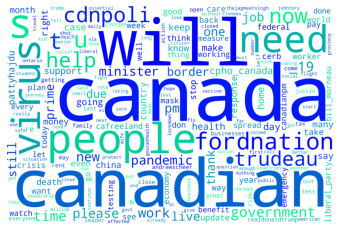

In [346]:
word_cloud, mean_sent_ju = sent_of_tweet_famous("@JustinTrudeau",tweets_sents_CAN_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @fordnation
5.2757952148661635
Number of tweets directed towards (mentioned) @fordnation
3065


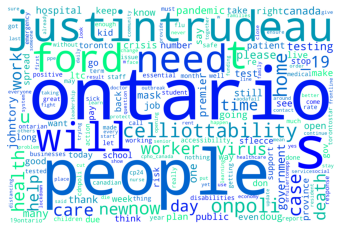

In [347]:
word_cloud, mean_sent_fo = sent_of_tweet_famous("@fordnation",tweets_sents_CAN_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @CBCNews
5.242407655832163
Number of tweets directed towards (mentioned) @CBCNews
1590


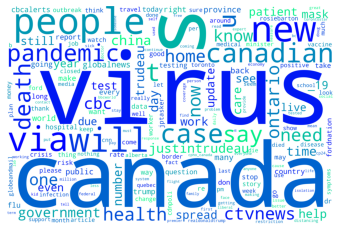

In [348]:
word_cloud, mean_sent_cb = sent_of_tweet_famous("@CBCNews",tweets_sents_CAN_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @CNN
5.192581811543778
Number of tweets directed towards (mentioned) @CNN
1007


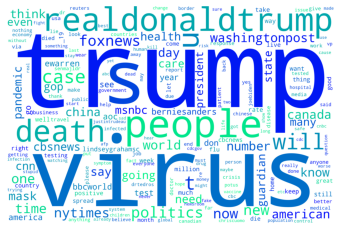

In [349]:
word_cloud, mean_sent_cnn = sent_of_tweet_famous("@CNN",tweets_sents_CAN_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @realDonaldTrump
5.126564871692501
Number of tweets directed towards (mentioned) @realDonaldTrump
6122


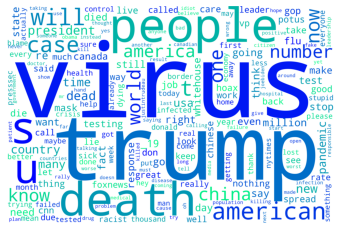

In [350]:
word_cloud, mean_sent_tr = sent_of_tweet_famous("@realDonaldTrump",tweets_sents_CAN_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @WHO
5.269234470653561
Number of tweets directed towards (mentioned) @WHO
868


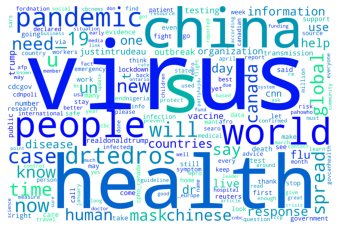

In [351]:
word_cloud, mean_sent_who = sent_of_tweet_famous("@WHO",tweets_sents_CAN_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

UK:

In [343]:
tweets_sents_UK_fam = tweets_sents_UK.reset_index(drop=True)
tweets_sents_UK_fam.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1234290271774543872,2.488199e+08,covid,2020-03-02 01:31:47,0.380,0.611,0.412,0.218,0.460,-1.0,F,HEALTH EMERGENCY / INTERNATIONAL COVID-19 CORO...,8.0,4.890000,10,0
1,1234291397202776065,2.488199e+08,covid,2020-03-02 01:36:15,0.408,0.505,0.422,0.218,0.417,-1.0,F,HEALTH EMERGENCY / INTERNATIONAL COVID-19 CORO...,23.0,5.446000,10,0
2,1234292673260879872,4.476634e+08,corona,2020-03-02 01:41:20,0.448,0.566,0.419,0.267,0.415,-1.0,F,Corruption scaring corona virus from Africa &g...,7.0,4.392000,10,0
3,1234294853330182144,2.097339e+07,covid,2020-03-02 01:49:59,0.406,0.613,0.458,0.271,0.460,-1.0,F,"The UK government is considering all options, ...",27.0,5.437778,10,0
4,1234297018010333184,9.673640e+17,corona,2020-03-02 01:58:35,0.445,0.517,0.526,0.221,0.414,-1.0,A,USA the land of liberty charges $3000 to get t...,28.0,5.240952,10,0


Average sentiment of tweets directed towards @BorisJohnson
5.238762570302505
Number of tweets directed towards (mentioned) @BorisJohnson
5755


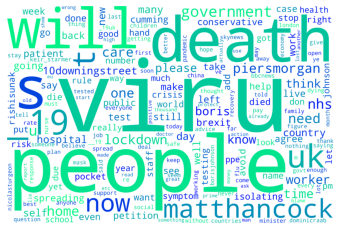

In [354]:
word_cloud, mean_sent_bo = sent_of_tweet_famous("@BorisJohnson", tweets_sents_UK_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @BBCNews
5.190499464148844
Number of tweets directed towards (mentioned) @BBCNews
2409


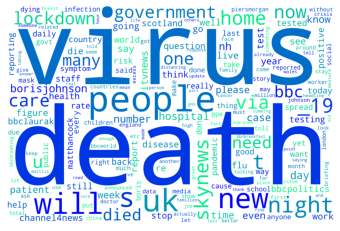

In [355]:
word_cloud, mean_sent_bb = sent_of_tweet_famous("@BBCNews", tweets_sents_UK_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @realDonaldTrump
5.14800332513896
Number of tweets directed towards (mentioned) @realDonaldTrump
2539


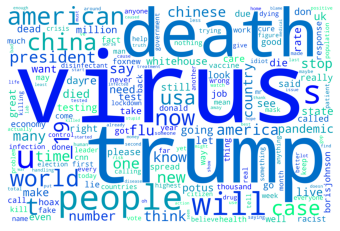

In [356]:
word_cloud, mean_sent_tr_u = sent_of_tweet_famous("@realDonaldTrump", tweets_sents_UK_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Average sentiment of tweets directed towards @WHO
5.259270269521546
Number of tweets directed towards (mentioned) @WHO
1045


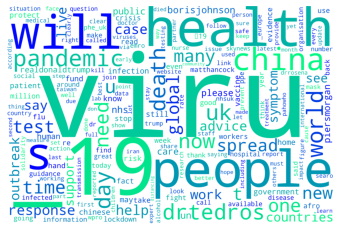

In [357]:
word_cloud, mean_sent_who_uk = sent_of_tweet_famous("@WHO", tweets_sents_UK_fam)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

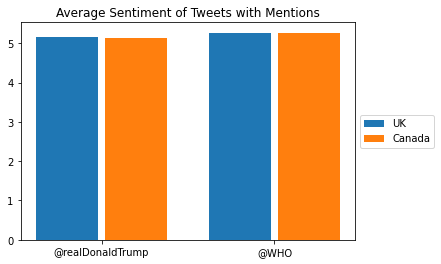

In [366]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(),loc='center left', bbox_to_anchor=(1, 0.5))


data = {
        "UK": [mean_sent_tr_u, mean_sent_who_uk],
        "Canada": [mean_sent_tr, mean_sent_who],
    }

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.xticks(np.arange(2), ('@realDonaldTrump', '@WHO'))
plt.title("Average Sentiment of Tweets with Mentions")
plt.show()

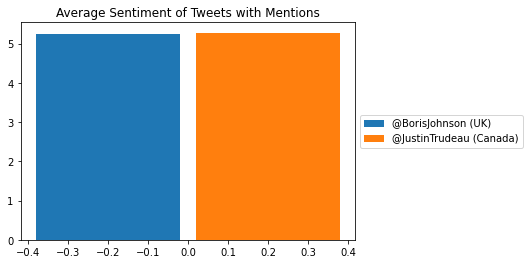

In [459]:
data = {
        "@BorisJohnson (UK)": [mean_sent_bo],
        "@JustinTrudeau (Canada)": [mean_sent_ju],
    }

fig, ax = plt.subplots()
bar_plot(ax, data, total_width=.8, single_width=.9)
plt.title("Average Sentiment of Tweets with Mentions")
plt.show()

**More Permutation Tests**

In [500]:
def run_test(K, n_obs, n_rest, perm_df):
    """Run label shuffling permutation test for community impurity computation K times. 

    Args:
        community (dict): Dict of community including parties as keys and their occurence count as values.

    Returns:
        list: List of average Gini impurity scores for communities for the different trials.
    """
    mean_perm_sent = []
    for _ in tqdm(range(K)):
        nums = np.ones(n_obs+n_rest)
        nums[:n_rest] = 0
        random.shuffle(nums)
        obs_score = perm_df.iloc[np.where(nums==1)]['sentiment_score']
    
        # Compute average Gini impurity score for communities and append
        mean_perm_sent.append(np.mean(obs_score))
    return mean_perm_sent
    

WHO:

In [378]:
idx_1 = []
df = tweets_sents_CAN_fam
for i in range(len(df)):
    if '@WHO' in df["tweet"][i]:
        idx_1.append(i)
        
idx_2 = []
df_1 = tweets_sents_UK_fam
for i in range(len(df_1)):
    if '@WHO' in df_1["tweet"][i]:
        idx_2.append(i)

In [381]:
tweets_sents_CAN_who = tweets_sents_CAN_fam.iloc[idx_1]
tweets_sents_CAN_who.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
172,1.222223e+18,2.416893e+09,corona,2020-01-28 18:21:21,0.458,0.476,0.485,0.311,0.426,-1.0,A,@marykingsley11 @CDCgov @WHO I found this arti...,24.0,5.280000,5,1
285,1.222273e+18,2.029328e+07,wuhan,2020-01-28 21:40:34,0.470,0.342,0.394,0.339,0.375,-1.0,A,@WHO @WHOWPRO @WHOSEARO @WHO_Europe @pahowho @...,49.0,5.205455,5,1
333,1.222301e+18,1.574283e+08,corona,2020-01-28 23:28:47,0.527,0.338,0.417,0.390,0.402,1.0,H,@piya @ShebaSid @WHO I vote “Insane Corona Pan...,12.0,5.440000,5,1
651,1.222566e+18,9.236274e+08,wuhan,2020-01-29 17:01:51,0.469,0.452,0.432,0.335,0.419,-1.0,F,"@WHO There are 49,000 hospital beds in 11 mill...",44.0,5.103125,5,1
818,1.222641e+18,7.746826e+17,nCoV,2020-01-29 22:00:09,0.383,0.601,0.476,0.274,0.533,-1.0,F,@WHO will re-convene tomorrow to discuss the p...,24.0,5.380000,5,1


In [382]:
tweets_sents_UK_who = tweets_sents_UK_fam.iloc[idx_2]
tweets_sents_UK_who.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
232,1234440756556959745,1.104535e+08,covid,2020-03-02 11:29:45,0.299,0.584,0.539,0.141,0.538,-2.0,F,Seeing some worrying retweets of dubious advic...,38.0,5.572308,10,0
342,1234472930937049089,1.218534e+08,covid,2020-03-02 13:37:36,0.560,0.348,0.345,0.367,0.329,1.0,H,@SteveBray999 @WHO The NHS has published advic...,33.0,5.381786,10,0
553,1234531926033260545,2.786597e+09,corona,2020-03-02 17:32:02,0.375,0.510,0.533,0.202,0.453,-1.0,A,@HypnoNox @WHO @DrTedros He also made the poin...,32.0,5.218400,10,0
630,1234552206361317377,3.008260e+08,covid,2020-03-02 18:52:37,0.357,0.505,0.535,0.293,0.473,-1.0,A,@ANDYPVFC @chrispearl82 @marksporter @WHO @Mar...,44.0,5.448710,10,0
637,1234554860051345408,1.489776e+09,covid,2020-03-02 19:03:10,0.461,0.442,0.417,0.296,0.363,-1.0,F,@wellcometrust @WorldBank @IMFNews Multilatera...,36.0,5.655789,10,0


In [383]:
perm_df_who = tweets_sents_UK_who.append(tweets_sents_CAN_who)
perm_df_who = perm_df_who.reset_index(drop=True)
perm_df_who.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.234441e+18,1.104535e+08,covid,2020-03-02 11:29:45,0.299,0.584,0.539,0.141,0.538,-2.0,F,Seeing some worrying retweets of dubious advic...,38.0,5.572308,10,0
1,1.234473e+18,1.218534e+08,covid,2020-03-02 13:37:36,0.560,0.348,0.345,0.367,0.329,1.0,H,@SteveBray999 @WHO The NHS has published advic...,33.0,5.381786,10,0
2,1.234532e+18,2.786597e+09,corona,2020-03-02 17:32:02,0.375,0.510,0.533,0.202,0.453,-1.0,A,@HypnoNox @WHO @DrTedros He also made the poin...,32.0,5.218400,10,0
3,1.234552e+18,3.008260e+08,covid,2020-03-02 18:52:37,0.357,0.505,0.535,0.293,0.473,-1.0,A,@ANDYPVFC @chrispearl82 @marksporter @WHO @Mar...,44.0,5.448710,10,0
4,1.234555e+18,1.489776e+09,covid,2020-03-02 19:03:10,0.461,0.442,0.417,0.296,0.363,-1.0,F,@wellcometrust @WorldBank @IMFNews Multilatera...,36.0,5.655789,10,0


In [384]:
random_can_who, random_uk_who = zip(*[shuffling_experiment(len(tweets_sents_UK_who), len(tweets_sents_CAN_who)) for i in tqdm(range(1000))])

100%|██████████| 1000/1000 [00:02<00:00, 425.85it/s]


In [385]:
mean_can_who = np.mean(tweets_sents_CAN_who['sentiment_score'])
mean_uk_who = np.mean(tweets_sents_UK_who['sentiment_score'])

In [386]:
p_value_can_who = np.sum(np.array(random_can_who)>mean_can_who)/1000
p_value_uk_who = np.sum(np.array(random_uk_who)< mean_uk_who)/1000

In [387]:
print(f"P-value for the first hypothesis: {p_value_can_who}\nP-value for the second hypothesis", p_value_uk_who)

P-value for the first hypothesis: 0.0
P-value for the second hypothesis 1.0


* H1: Canadian tweets mentioning @WHO have a higher averge value for sentiment than a similarly sized set of randomly selected tweets.
* *H2: UK tweets mentioning @WHO have a lower average value for sentiment than a similarly sized set of randomly selected tweets.

>In order to perform the label permutation test, we randomly shuffled the labels of all Canadian and UK tweets 1000 times (by keeping the same total number of Canadian and UK tweets) and for each of these random experiment we calculated the average sentiment score. Then to test the first hypothesis, we considered the fraction of times that the sentiment score for the randomly selected Canadian tweets was higher than the average sentiment score of the Canadian tweets in the superheroes network, this proportion can be considered as a p-value. We did the same for the UK tweets but we considered the proportion of the average sentiment score for the randomly selected UK tweets that was lower than the average sentiment score for the UK tweets in the superheroes network. As we can see, both p-values are zero which means that we can reject the null hypothesis that in this case are respectively:
 >* H0 (for H1): there is no difference between Canadian tweets' sentiment score and randomly selected tweets.
 >* H0 (for H2): there is no difference between UK tweets' sentimnent score and randomly selected tweets.

>Thus, under the assumption that both these null hypothesis are true, the probability of observing such differences would be 1. We can thus accept both null hypothesis and reject the alternative hypothesis H1 and H2.

Donald Trump:

In [553]:
idx_1 = []
df = tweets_sents_CAN_fam
for i in range(len(df)):
    if '@realDonaldTrump' in df["tweet"][i]:
        idx_1.append(i)
        
idx_2 = []
df_2 = tweets_sents_UK_fam
for i in range(len(df_2)):
    if '@realDonaldTrump' in df_2["tweet"][i]:
        idx_2.append(i)

In [554]:
df_1 = tweets_sents_CAN_fam.drop(idx_1, axis=0)

In [555]:
tweets_sents_CAN_dt = tweets_sents_CAN_fam.iloc[idx_1]
tweets_sents_CAN_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
104,1.222187e+18,3.064354e+08,wuhan,2020-01-28 15:56:12,0.396,0.613,0.472,0.225,0.483,-1.0,F,"China counts 106 coronavirus deaths as US, oth...",18.0,4.732500,5,1
763,1.222613e+18,8.201315e+17,wuhan,2020-01-29 20:11:27,0.528,0.395,0.444,0.361,0.410,1.0,H,@realDonaldTrump The platform is “Make America...,27.0,5.453684,5,1
1395,1.223100e+18,8.185036e+17,wuhan,2020-01-31 04:24:30,0.460,0.405,0.445,0.310,0.392,-1.0,A,"@realDonaldTrump Actually it’s 6 , I guess you...",28.0,5.335000,5,1
1478,1.223225e+18,6.933717e+07,corona,2020-01-31 12:41:40,0.358,0.564,0.488,0.182,0.469,-1.0,F,@realDonaldTrump Category as Corona virus and ...,8.0,4.173333,5,1
1662,1.223350e+18,1.014997e+18,corona,2020-01-31 20:59:00,0.332,0.444,0.542,0.210,0.442,-1.0,A,When is @JustinTrudeau going to wake up. Ther...,38.0,5.216154,5,1


In [556]:
tweets_sents_UK_dt = tweets_sents_UK_fam.iloc[idx_2]
tweets_sents_UK_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
514,1234521752417513473,23429434.0,corona,2020-03-02 16:51:36,0.417,0.548,0.410,0.241,0.393,-1.0,F,@realDonaldTrump @abcnews Are you looking at h...,22.0,4.996000,10,0
656,1234560228466753537,33183740.0,corona,2020-03-02 19:24:30,0.294,0.501,0.460,0.190,0.469,-2.0,F,@Wldesertrose @sanityends @Deana06119944 @Andy...,12.0,3.990000,10,0
809,1234605388110147589,21222912.0,covid,2020-03-02 22:23:57,0.419,0.460,0.492,0.215,0.448,-1.0,A,@TeamTrump @realDonaldTrump Since no other adm...,27.0,5.293333,10,0
851,1234619761209872384,272932839.0,covid,2020-03-02 23:21:03,0.401,0.425,0.502,0.249,0.455,-1.0,A,@my2cent95070851 @real_defender @realDonaldTru...,21.0,6.006667,10,0
916,1234690980483403776,6959392.0,covid,2020-03-03 04:04:03,0.281,0.582,0.495,0.147,0.550,-2.0,F,@realDonaldTrump Remind me again how many peop...,15.0,5.170000,10,0


In [557]:
df_2 = tweets_sents_UK_fam.drop(idx_2, axis=0)

In [558]:
perm_df_dt = tweets_sents_UK_dt.append(df_2)
perm_df_dt = perm_df_dt.reset_index(drop=True)
perm_df_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1234521752417513473,23429434.0,corona,2020-03-02 16:51:36,0.417,0.548,0.410,0.241,0.393,-1.0,F,@realDonaldTrump @abcnews Are you looking at h...,22.0,4.996000,10,0
1,1234560228466753537,33183740.0,corona,2020-03-02 19:24:30,0.294,0.501,0.460,0.190,0.469,-2.0,F,@Wldesertrose @sanityends @Deana06119944 @Andy...,12.0,3.990000,10,0
2,1234605388110147589,21222912.0,covid,2020-03-02 22:23:57,0.419,0.460,0.492,0.215,0.448,-1.0,A,@TeamTrump @realDonaldTrump Since no other adm...,27.0,5.293333,10,0
3,1234619761209872384,272932839.0,covid,2020-03-02 23:21:03,0.401,0.425,0.502,0.249,0.455,-1.0,A,@my2cent95070851 @real_defender @realDonaldTru...,21.0,6.006667,10,0
4,1234690980483403776,6959392.0,covid,2020-03-03 04:04:03,0.281,0.582,0.495,0.147,0.550,-2.0,F,@realDonaldTrump Remind me again how many peop...,15.0,5.170000,10,0


In [559]:
dt_res = run_test(1000,len(tweets_sents_UK_dt), len(df_2), perm_df_dt)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<05:47,  2.87it/s]

  0%|          | 2/1000 [00:00<05:42,  2.91it/s]

  0%|          | 3/1000 [00:01<05:46,  2.88it/s]

  0%|          | 4/1000 [00:01<06:14,  2.66it/s]

  0%|          | 5/1000 [00:01<06:06,  2.71it/s]

  1%|          | 6/1000 [00:02<06:05,  2.72it/s]

  1%|          | 7/1000 [00:02<06:02,  2.74it/s]

  1%|          | 8/1000 [00:02<05:59,  2.76it/s]

  1%|          | 9/1000 [00:03<06:01,  2.74it/s]

  1%|          | 10/1000 [00:03<06:00,  2.74it/s]

  1%|          | 11/1000 [00:03<05:55,  2.78it/s]

  1%|          | 12/1000 [00:04<05:54,  2.79it/s]

  1%|▏         | 13/1000 [00:04<05:52,  2.80it/s]

  1%|▏         | 14/1000 [00:05<05:56,  2.76it/s]

  2%|▏         | 15/1000 [00:05<05:54,  2.78it/s]

  2%|▏         | 16/1000 [00:05<05:58,  2.75it/s]

  2%|▏         | 17/1000 [00:06<06:00,  2.72it/s]

  2%|▏         | 18/1000 [00:06<05:59,  2.73it/s]

  2%|▏         | 19/1000 [00:06<06:00,  2.72it/

 14%|█▍        | 143/1000 [00:48<04:37,  3.09it/s]

 14%|█▍        | 144/1000 [00:48<04:37,  3.09it/s]

 14%|█▍        | 145/1000 [00:48<04:36,  3.09it/s]

 15%|█▍        | 146/1000 [00:49<04:37,  3.08it/s]

 15%|█▍        | 147/1000 [00:49<04:34,  3.11it/s]

 15%|█▍        | 148/1000 [00:49<04:33,  3.11it/s]

 15%|█▍        | 149/1000 [00:50<04:37,  3.06it/s]

 15%|█▌        | 150/1000 [00:50<04:35,  3.08it/s]

 15%|█▌        | 151/1000 [00:50<04:36,  3.07it/s]

 15%|█▌        | 152/1000 [00:51<04:36,  3.06it/s]

 15%|█▌        | 153/1000 [00:51<04:37,  3.05it/s]

 15%|█▌        | 154/1000 [00:51<04:35,  3.07it/s]

 16%|█▌        | 155/1000 [00:52<04:34,  3.08it/s]

 16%|█▌        | 156/1000 [00:52<04:35,  3.06it/s]

 16%|█▌        | 157/1000 [00:52<04:36,  3.05it/s]

 16%|█▌        | 158/1000 [00:53<04:35,  3.06it/s]

 16%|█▌        | 159/1000 [00:53<04:34,  3.06it/s]

 16%|█▌        | 160/1000 [00:53<04:34,  3.06it/s]

 16%|█▌        | 161/1000 [00:54<04:37,  3.02it/s]

 16%|█▌     

 28%|██▊       | 284/1000 [01:34<04:37,  2.58it/s]

 28%|██▊       | 285/1000 [01:35<04:34,  2.60it/s]

 29%|██▊       | 286/1000 [01:35<04:27,  2.67it/s]

 29%|██▊       | 287/1000 [01:35<04:25,  2.68it/s]

 29%|██▉       | 288/1000 [01:36<04:26,  2.67it/s]

 29%|██▉       | 289/1000 [01:36<04:17,  2.76it/s]

 29%|██▉       | 290/1000 [01:36<04:09,  2.84it/s]

 29%|██▉       | 291/1000 [01:37<04:03,  2.91it/s]

 29%|██▉       | 292/1000 [01:37<03:59,  2.95it/s]

 29%|██▉       | 293/1000 [01:37<03:56,  2.99it/s]

 29%|██▉       | 294/1000 [01:38<03:54,  3.01it/s]

 30%|██▉       | 295/1000 [01:38<03:53,  3.02it/s]

 30%|██▉       | 296/1000 [01:38<03:51,  3.05it/s]

 30%|██▉       | 297/1000 [01:39<03:51,  3.03it/s]

 30%|██▉       | 298/1000 [01:39<03:50,  3.04it/s]

 30%|██▉       | 299/1000 [01:39<03:49,  3.05it/s]

 30%|███       | 300/1000 [01:40<03:49,  3.05it/s]

 30%|███       | 301/1000 [01:40<03:47,  3.07it/s]

 30%|███       | 302/1000 [01:40<03:49,  3.04it/s]

 30%|███    

 42%|████▎     | 425/1000 [02:21<03:21,  2.86it/s]

 43%|████▎     | 426/1000 [02:21<03:17,  2.90it/s]

 43%|████▎     | 427/1000 [02:22<03:15,  2.94it/s]

 43%|████▎     | 428/1000 [02:22<03:15,  2.93it/s]

 43%|████▎     | 429/1000 [02:22<03:12,  2.97it/s]

 43%|████▎     | 430/1000 [02:23<03:10,  3.00it/s]

 43%|████▎     | 431/1000 [02:23<03:13,  2.94it/s]

 43%|████▎     | 432/1000 [02:23<03:18,  2.86it/s]

 43%|████▎     | 433/1000 [02:24<03:23,  2.78it/s]

 43%|████▎     | 434/1000 [02:24<03:27,  2.73it/s]

 44%|████▎     | 435/1000 [02:25<03:31,  2.67it/s]

 44%|████▎     | 436/1000 [02:25<03:36,  2.60it/s]

 44%|████▎     | 437/1000 [02:25<03:36,  2.60it/s]

 44%|████▍     | 438/1000 [02:26<03:30,  2.67it/s]

 44%|████▍     | 439/1000 [02:26<03:26,  2.72it/s]

 44%|████▍     | 440/1000 [02:26<03:26,  2.71it/s]

 44%|████▍     | 441/1000 [02:27<03:26,  2.71it/s]

 44%|████▍     | 442/1000 [02:27<03:25,  2.72it/s]

 44%|████▍     | 443/1000 [02:28<03:24,  2.72it/s]

 44%|████▍  

 57%|█████▋    | 566/1000 [03:13<02:40,  2.70it/s]

 57%|█████▋    | 567/1000 [03:13<02:35,  2.79it/s]

 57%|█████▋    | 568/1000 [03:14<02:32,  2.83it/s]

 57%|█████▋    | 569/1000 [03:14<02:32,  2.82it/s]

 57%|█████▋    | 570/1000 [03:14<02:30,  2.85it/s]

 57%|█████▋    | 571/1000 [03:15<02:26,  2.93it/s]

 57%|█████▋    | 572/1000 [03:15<02:24,  2.97it/s]

 57%|█████▋    | 573/1000 [03:15<02:25,  2.92it/s]

 57%|█████▋    | 574/1000 [03:16<02:25,  2.92it/s]

 57%|█████▊    | 575/1000 [03:16<02:27,  2.89it/s]

 58%|█████▊    | 576/1000 [03:16<02:23,  2.96it/s]

 58%|█████▊    | 577/1000 [03:17<02:25,  2.91it/s]

 58%|█████▊    | 578/1000 [03:17<02:22,  2.96it/s]

 58%|█████▊    | 579/1000 [03:17<02:20,  2.99it/s]

 58%|█████▊    | 580/1000 [03:18<02:22,  2.95it/s]

 58%|█████▊    | 581/1000 [03:18<02:23,  2.91it/s]

 58%|█████▊    | 582/1000 [03:18<02:23,  2.91it/s]

 58%|█████▊    | 583/1000 [03:19<02:24,  2.88it/s]

 58%|█████▊    | 584/1000 [03:19<02:28,  2.81it/s]

 58%|█████▊ 

 71%|███████   | 707/1000 [04:02<01:49,  2.67it/s]

 71%|███████   | 708/1000 [04:03<01:49,  2.66it/s]

 71%|███████   | 709/1000 [04:03<01:49,  2.66it/s]

 71%|███████   | 710/1000 [04:03<01:48,  2.67it/s]

 71%|███████   | 711/1000 [04:04<01:48,  2.65it/s]

 71%|███████   | 712/1000 [04:04<01:49,  2.64it/s]

 71%|███████▏  | 713/1000 [04:05<01:49,  2.61it/s]

 71%|███████▏  | 714/1000 [04:05<01:49,  2.61it/s]

 72%|███████▏  | 715/1000 [04:05<01:49,  2.60it/s]

 72%|███████▏  | 716/1000 [04:06<01:47,  2.63it/s]

 72%|███████▏  | 717/1000 [04:06<01:47,  2.63it/s]

 72%|███████▏  | 718/1000 [04:06<01:48,  2.60it/s]

 72%|███████▏  | 719/1000 [04:07<01:45,  2.66it/s]

 72%|███████▏  | 720/1000 [04:07<01:46,  2.62it/s]

 72%|███████▏  | 721/1000 [04:08<01:48,  2.57it/s]

 72%|███████▏  | 722/1000 [04:08<01:46,  2.62it/s]

 72%|███████▏  | 723/1000 [04:08<01:41,  2.72it/s]

 72%|███████▏  | 724/1000 [04:09<01:39,  2.77it/s]

 72%|███████▎  | 725/1000 [04:09<01:37,  2.82it/s]

 73%|███████

 85%|████████▍ | 848/1000 [04:51<00:57,  2.64it/s]

 85%|████████▍ | 849/1000 [04:52<00:56,  2.65it/s]

 85%|████████▌ | 850/1000 [04:52<00:56,  2.65it/s]

 85%|████████▌ | 851/1000 [04:52<00:55,  2.68it/s]

 85%|████████▌ | 852/1000 [04:53<00:55,  2.68it/s]

 85%|████████▌ | 853/1000 [04:53<00:54,  2.69it/s]

 85%|████████▌ | 854/1000 [04:53<00:53,  2.74it/s]

 86%|████████▌ | 855/1000 [04:54<00:51,  2.82it/s]

 86%|████████▌ | 856/1000 [04:54<00:49,  2.90it/s]

 86%|████████▌ | 857/1000 [04:54<00:48,  2.97it/s]

 86%|████████▌ | 858/1000 [04:55<00:47,  3.01it/s]

 86%|████████▌ | 859/1000 [04:55<00:47,  2.98it/s]

 86%|████████▌ | 860/1000 [04:55<00:47,  2.97it/s]

 86%|████████▌ | 861/1000 [04:56<00:47,  2.93it/s]

 86%|████████▌ | 862/1000 [04:56<00:48,  2.84it/s]

 86%|████████▋ | 863/1000 [04:57<00:49,  2.75it/s]

 86%|████████▋ | 864/1000 [04:57<00:50,  2.70it/s]

 86%|████████▋ | 865/1000 [04:57<00:49,  2.74it/s]

 87%|████████▋ | 866/1000 [04:58<00:47,  2.82it/s]

 87%|███████

 99%|█████████▉| 989/1000 [05:39<00:03,  3.05it/s]

 99%|█████████▉| 990/1000 [05:40<00:03,  3.07it/s]

 99%|█████████▉| 991/1000 [05:40<00:02,  3.04it/s]

 99%|█████████▉| 992/1000 [05:40<00:02,  3.01it/s]

 99%|█████████▉| 993/1000 [05:41<00:02,  3.05it/s]

 99%|█████████▉| 994/1000 [05:41<00:01,  3.07it/s]

100%|█████████▉| 995/1000 [05:41<00:01,  3.04it/s]

100%|█████████▉| 996/1000 [05:42<00:01,  3.03it/s]

100%|█████████▉| 997/1000 [05:42<00:00,  3.06it/s]

100%|█████████▉| 998/1000 [05:42<00:00,  3.04it/s]

100%|█████████▉| 999/1000 [05:43<00:00,  3.03it/s]

100%|██████████| 1000/1000 [05:43<00:00,  2.91it/s]


[]

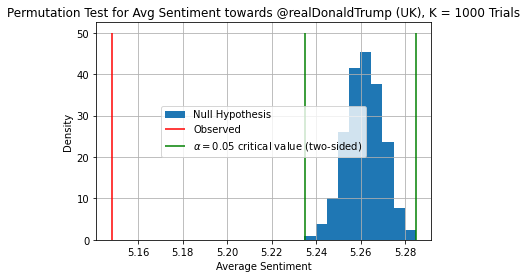

In [560]:
## Historgram ##
plt.hist(dt_res, density=True, label="Null Hypothesis")
plt.vlines(np.mean(list(tweets_sents_UK_dt["sentiment_score"])), 0, 50, color="red", label="Observed")
plt.vlines(sorted(dt_res)[int(0.025/2*100)], 0, 50, color="green", label=r"$\alpha=0.05$ critical value (two-sided)")
plt.vlines(sorted(dt_res)[-int(0.025/2*100)], 0, 50, color="green")
plt.title("Permutation Test for Avg Sentiment towards @realDonaldTrump (UK), K = 1000 Trials")
plt.xlabel("Average Sentiment")
plt.ylabel("Density")

# Put a legend to the right of the current axis
plt.legend(loc='center')
plt.grid()
#plt.legend(loc='lower right')
plt.plot()

In [561]:
perm_df_dt = tweets_sents_CAN_dt.append(df_1)
perm_df_dt = perm_df_dt.reset_index(drop=True)
perm_df_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.222187e+18,3.064354e+08,wuhan,2020-01-28 15:56:12,0.396,0.613,0.472,0.225,0.483,-1.0,F,"China counts 106 coronavirus deaths as US, oth...",18.0,4.732500,5,1
1,1.222613e+18,8.201315e+17,wuhan,2020-01-29 20:11:27,0.528,0.395,0.444,0.361,0.410,1.0,H,@realDonaldTrump The platform is “Make America...,27.0,5.453684,5,1
2,1.223100e+18,8.185036e+17,wuhan,2020-01-31 04:24:30,0.460,0.405,0.445,0.310,0.392,-1.0,A,"@realDonaldTrump Actually it’s 6 , I guess you...",28.0,5.335000,5,1
3,1.223225e+18,6.933717e+07,corona,2020-01-31 12:41:40,0.358,0.564,0.488,0.182,0.469,-1.0,F,@realDonaldTrump Category as Corona virus and ...,8.0,4.173333,5,1
4,1.223350e+18,1.014997e+18,corona,2020-01-31 20:59:00,0.332,0.444,0.542,0.210,0.442,-1.0,A,When is @JustinTrudeau going to wake up. Ther...,38.0,5.216154,5,1


In [562]:
dt_res = run_test(1000,len(tweets_sents_CAN_dt), len(df_1), perm_df_dt)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<06:09,  2.71it/s]

  0%|          | 2/1000 [00:00<06:05,  2.73it/s]

  0%|          | 3/1000 [00:01<06:16,  2.64it/s]

  0%|          | 4/1000 [00:01<06:11,  2.68it/s]

  0%|          | 5/1000 [00:01<06:05,  2.72it/s]

  1%|          | 6/1000 [00:02<05:57,  2.78it/s]

  1%|          | 7/1000 [00:02<06:01,  2.74it/s]

  1%|          | 8/1000 [00:02<05:54,  2.79it/s]

  1%|          | 9/1000 [00:03<05:58,  2.77it/s]

  1%|          | 10/1000 [00:03<05:53,  2.80it/s]

  1%|          | 11/1000 [00:03<05:48,  2.83it/s]

  1%|          | 12/1000 [00:04<05:41,  2.89it/s]

  1%|▏         | 13/1000 [00:04<05:37,  2.92it/s]

  1%|▏         | 14/1000 [00:04<05:35,  2.94it/s]

  2%|▏         | 15/1000 [00:05<05:37,  2.92it/s]

  2%|▏         | 16/1000 [00:05<05:34,  2.94it/s]

  2%|▏         | 17/1000 [00:05<05:31,  2.96it/s]

  2%|▏         | 18/1000 [00:06<05:33,  2.95it/s]

  2%|▏         | 19/1000 [00:06<05:30,  2.97it/

 14%|█▍        | 143/1000 [00:48<04:44,  3.01it/s]

 14%|█▍        | 144/1000 [00:49<04:45,  3.00it/s]

 14%|█▍        | 145/1000 [00:49<04:44,  3.00it/s]

 15%|█▍        | 146/1000 [00:49<04:42,  3.02it/s]

 15%|█▍        | 147/1000 [00:50<04:43,  3.01it/s]

 15%|█▍        | 148/1000 [00:50<04:40,  3.04it/s]

 15%|█▍        | 149/1000 [00:50<04:40,  3.03it/s]

 15%|█▌        | 150/1000 [00:51<04:40,  3.03it/s]

 15%|█▌        | 151/1000 [00:51<04:39,  3.04it/s]

 15%|█▌        | 152/1000 [00:51<04:37,  3.06it/s]

 15%|█▌        | 153/1000 [00:52<04:36,  3.06it/s]

 15%|█▌        | 154/1000 [00:52<04:36,  3.06it/s]

 16%|█▌        | 155/1000 [00:52<04:35,  3.07it/s]

 16%|█▌        | 156/1000 [00:53<04:36,  3.05it/s]

 16%|█▌        | 157/1000 [00:53<04:42,  2.98it/s]

 16%|█▌        | 158/1000 [00:53<04:46,  2.94it/s]

 16%|█▌        | 159/1000 [00:54<04:48,  2.92it/s]

 16%|█▌        | 160/1000 [00:54<04:46,  2.93it/s]

 16%|█▌        | 161/1000 [00:54<04:42,  2.98it/s]

 16%|█▌     

 28%|██▊       | 284/1000 [01:36<04:00,  2.98it/s]

 28%|██▊       | 285/1000 [01:37<04:01,  2.96it/s]

 29%|██▊       | 286/1000 [01:37<03:59,  2.99it/s]

 29%|██▊       | 287/1000 [01:37<03:57,  3.00it/s]

 29%|██▉       | 288/1000 [01:38<03:57,  3.00it/s]

 29%|██▉       | 289/1000 [01:38<03:55,  3.02it/s]

 29%|██▉       | 290/1000 [01:38<03:57,  2.99it/s]

 29%|██▉       | 291/1000 [01:39<03:56,  3.00it/s]

 29%|██▉       | 292/1000 [01:39<03:54,  3.02it/s]

 29%|██▉       | 293/1000 [01:39<03:54,  3.01it/s]

 29%|██▉       | 294/1000 [01:40<03:53,  3.02it/s]

 30%|██▉       | 295/1000 [01:40<03:51,  3.04it/s]

 30%|██▉       | 296/1000 [01:40<03:51,  3.04it/s]

 30%|██▉       | 297/1000 [01:41<03:53,  3.01it/s]

 30%|██▉       | 298/1000 [01:41<03:51,  3.03it/s]

 30%|██▉       | 299/1000 [01:41<03:52,  3.02it/s]

 30%|███       | 300/1000 [01:42<03:52,  3.01it/s]

 30%|███       | 301/1000 [01:42<03:52,  3.01it/s]

 30%|███       | 302/1000 [01:42<03:51,  3.02it/s]

 30%|███    

 42%|████▎     | 425/1000 [02:23<03:11,  3.00it/s]

 43%|████▎     | 426/1000 [02:23<03:12,  2.98it/s]

 43%|████▎     | 427/1000 [02:24<03:11,  2.99it/s]

 43%|████▎     | 428/1000 [02:24<03:11,  2.99it/s]

 43%|████▎     | 429/1000 [02:24<03:10,  2.99it/s]

 43%|████▎     | 430/1000 [02:25<03:10,  2.99it/s]

 43%|████▎     | 431/1000 [02:25<03:09,  3.01it/s]

 43%|████▎     | 432/1000 [02:25<03:08,  3.02it/s]

 43%|████▎     | 433/1000 [02:26<03:09,  3.00it/s]

 43%|████▎     | 434/1000 [02:26<03:10,  2.97it/s]

 44%|████▎     | 435/1000 [02:26<03:17,  2.86it/s]

 44%|████▎     | 436/1000 [02:27<03:14,  2.90it/s]

 44%|████▎     | 437/1000 [02:27<03:13,  2.91it/s]

 44%|████▍     | 438/1000 [02:27<03:11,  2.93it/s]

 44%|████▍     | 439/1000 [02:28<03:09,  2.96it/s]

 44%|████▍     | 440/1000 [02:28<03:07,  2.98it/s]

 44%|████▍     | 441/1000 [02:28<03:07,  2.98it/s]

 44%|████▍     | 442/1000 [02:29<03:05,  3.00it/s]

 44%|████▍     | 443/1000 [02:29<03:04,  3.02it/s]

 44%|████▍  

 57%|█████▋    | 566/1000 [03:12<02:40,  2.70it/s]

 57%|█████▋    | 567/1000 [03:13<02:44,  2.64it/s]

 57%|█████▋    | 568/1000 [03:13<02:43,  2.64it/s]

 57%|█████▋    | 569/1000 [03:14<02:42,  2.66it/s]

 57%|█████▋    | 570/1000 [03:14<02:36,  2.74it/s]

 57%|█████▋    | 571/1000 [03:14<02:32,  2.81it/s]

 57%|█████▋    | 572/1000 [03:15<02:30,  2.84it/s]

 57%|█████▋    | 573/1000 [03:15<02:29,  2.85it/s]

 57%|█████▋    | 574/1000 [03:15<02:30,  2.83it/s]

 57%|█████▊    | 575/1000 [03:16<02:30,  2.83it/s]

 58%|█████▊    | 576/1000 [03:16<02:27,  2.87it/s]

 58%|█████▊    | 577/1000 [03:16<02:31,  2.79it/s]

 58%|█████▊    | 578/1000 [03:17<02:33,  2.75it/s]

 58%|█████▊    | 579/1000 [03:17<02:40,  2.63it/s]

 58%|█████▊    | 580/1000 [03:18<02:43,  2.56it/s]

 58%|█████▊    | 581/1000 [03:18<02:45,  2.53it/s]

 58%|█████▊    | 582/1000 [03:18<02:42,  2.57it/s]

 58%|█████▊    | 583/1000 [03:19<02:40,  2.59it/s]

 58%|█████▊    | 584/1000 [03:19<02:37,  2.64it/s]

 58%|█████▊ 

 71%|███████   | 707/1000 [04:04<01:39,  2.96it/s]

 71%|███████   | 708/1000 [04:04<01:38,  2.97it/s]

 71%|███████   | 709/1000 [04:04<01:38,  2.95it/s]

 71%|███████   | 710/1000 [04:05<01:38,  2.96it/s]

 71%|███████   | 711/1000 [04:05<01:37,  2.97it/s]

 71%|███████   | 712/1000 [04:05<01:37,  2.97it/s]

 71%|███████▏  | 713/1000 [04:06<01:36,  2.98it/s]

 71%|███████▏  | 714/1000 [04:06<01:35,  2.99it/s]

 72%|███████▏  | 715/1000 [04:06<01:35,  3.00it/s]

 72%|███████▏  | 716/1000 [04:07<01:34,  3.00it/s]

 72%|███████▏  | 717/1000 [04:07<01:34,  3.01it/s]

 72%|███████▏  | 718/1000 [04:07<01:34,  2.98it/s]

 72%|███████▏  | 719/1000 [04:08<01:34,  2.98it/s]

 72%|███████▏  | 720/1000 [04:08<01:33,  3.00it/s]

 72%|███████▏  | 721/1000 [04:08<01:33,  2.99it/s]

 72%|███████▏  | 722/1000 [04:09<01:33,  2.99it/s]

 72%|███████▏  | 723/1000 [04:09<01:32,  3.00it/s]

 72%|███████▏  | 724/1000 [04:09<01:32,  3.00it/s]

 72%|███████▎  | 725/1000 [04:10<01:31,  3.00it/s]

 73%|███████

 85%|████████▍ | 848/1000 [04:52<00:57,  2.66it/s]

 85%|████████▍ | 849/1000 [04:52<00:55,  2.73it/s]

 85%|████████▌ | 850/1000 [04:53<00:54,  2.74it/s]

 85%|████████▌ | 851/1000 [04:53<00:57,  2.59it/s]

 85%|████████▌ | 852/1000 [04:54<00:57,  2.59it/s]

 85%|████████▌ | 853/1000 [04:54<00:56,  2.58it/s]

 85%|████████▌ | 854/1000 [04:54<00:56,  2.61it/s]

 86%|████████▌ | 855/1000 [04:55<00:54,  2.64it/s]

 86%|████████▌ | 856/1000 [04:55<00:55,  2.61it/s]

 86%|████████▌ | 857/1000 [04:55<00:54,  2.61it/s]

 86%|████████▌ | 858/1000 [04:56<00:54,  2.61it/s]

 86%|████████▌ | 859/1000 [04:56<00:53,  2.63it/s]

 86%|████████▌ | 860/1000 [04:57<00:53,  2.60it/s]

 86%|████████▌ | 861/1000 [04:57<00:53,  2.59it/s]

 86%|████████▌ | 862/1000 [04:57<00:52,  2.62it/s]

 86%|████████▋ | 863/1000 [04:58<00:51,  2.67it/s]

 86%|████████▋ | 864/1000 [04:58<00:50,  2.71it/s]

 86%|████████▋ | 865/1000 [04:58<00:48,  2.77it/s]

 87%|████████▋ | 866/1000 [04:59<00:48,  2.76it/s]

 87%|███████

 99%|█████████▉| 989/1000 [05:44<00:04,  2.63it/s]

 99%|█████████▉| 990/1000 [05:44<00:03,  2.61it/s]

 99%|█████████▉| 991/1000 [05:44<00:03,  2.59it/s]

 99%|█████████▉| 992/1000 [05:45<00:03,  2.60it/s]

 99%|█████████▉| 993/1000 [05:45<00:02,  2.56it/s]

 99%|█████████▉| 994/1000 [05:46<00:02,  2.57it/s]

100%|█████████▉| 995/1000 [05:46<00:01,  2.56it/s]

100%|█████████▉| 996/1000 [05:46<00:01,  2.59it/s]

100%|█████████▉| 997/1000 [05:47<00:01,  2.56it/s]

100%|█████████▉| 998/1000 [05:47<00:00,  2.55it/s]

100%|█████████▉| 999/1000 [05:48<00:00,  2.54it/s]

100%|██████████| 1000/1000 [05:48<00:00,  2.87it/s]


[]

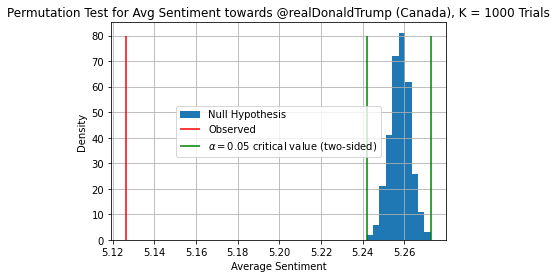

In [565]:
## Historgram ##
plt.hist(dt_res, density=True, label="Null Hypothesis")
plt.vlines(np.mean(list(tweets_sents_CAN_dt["sentiment_score"])), 0, 80, color="red", label="Observed")
plt.vlines(sorted(dt_res)[int(0.025/2*100)], 0, 80, color="green", label=r"$\alpha=0.05$ critical value (two-sided)")
plt.vlines(sorted(dt_res)[-int(0.025/2*100)], 0, 80, color="green")
plt.title("Permutation Test for Avg Sentiment towards @realDonaldTrump (Canada), K = 1000 Trials")
plt.xlabel("Average Sentiment")
plt.ylabel("Density")

# Put a legend to the right of the current axis
plt.legend(loc='center')
plt.grid()
#plt.legend(loc='lower right')
plt.plot()

WHO:

In [566]:
idx_1 = []
df = tweets_sents_CAN_fam
for i in range(len(df)):
    if '@WHO' in df["tweet"][i]:
        idx_1.append(i)
        
idx_2 = []
df_2 = tweets_sents_UK_fam
for i in range(len(df_2)):
    if '@WHO' in df_2["tweet"][i]:
        idx_2.append(i)

In [567]:
df_1 = tweets_sents_CAN_fam.drop(idx_1, axis=0)

In [568]:
tweets_sents_CAN_dt = tweets_sents_CAN_fam.iloc[idx_1]
tweets_sents_CAN_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
172,1.222223e+18,2.416893e+09,corona,2020-01-28 18:21:21,0.458,0.476,0.485,0.311,0.426,-1.0,A,@marykingsley11 @CDCgov @WHO I found this arti...,24.0,5.280000,5,1
285,1.222273e+18,2.029328e+07,wuhan,2020-01-28 21:40:34,0.470,0.342,0.394,0.339,0.375,-1.0,A,@WHO @WHOWPRO @WHOSEARO @WHO_Europe @pahowho @...,49.0,5.205455,5,1
333,1.222301e+18,1.574283e+08,corona,2020-01-28 23:28:47,0.527,0.338,0.417,0.390,0.402,1.0,H,@piya @ShebaSid @WHO I vote “Insane Corona Pan...,12.0,5.440000,5,1
651,1.222566e+18,9.236274e+08,wuhan,2020-01-29 17:01:51,0.469,0.452,0.432,0.335,0.419,-1.0,F,"@WHO There are 49,000 hospital beds in 11 mill...",44.0,5.103125,5,1
818,1.222641e+18,7.746826e+17,nCoV,2020-01-29 22:00:09,0.383,0.601,0.476,0.274,0.533,-1.0,F,@WHO will re-convene tomorrow to discuss the p...,24.0,5.380000,5,1


In [569]:
tweets_sents_UK_dt = tweets_sents_UK_fam.iloc[idx_2]
tweets_sents_UK_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
232,1234440756556959745,1.104535e+08,covid,2020-03-02 11:29:45,0.299,0.584,0.539,0.141,0.538,-2.0,F,Seeing some worrying retweets of dubious advic...,38.0,5.572308,10,0
342,1234472930937049089,1.218534e+08,covid,2020-03-02 13:37:36,0.560,0.348,0.345,0.367,0.329,1.0,H,@SteveBray999 @WHO The NHS has published advic...,33.0,5.381786,10,0
553,1234531926033260545,2.786597e+09,corona,2020-03-02 17:32:02,0.375,0.510,0.533,0.202,0.453,-1.0,A,@HypnoNox @WHO @DrTedros He also made the poin...,32.0,5.218400,10,0
630,1234552206361317377,3.008260e+08,covid,2020-03-02 18:52:37,0.357,0.505,0.535,0.293,0.473,-1.0,A,@ANDYPVFC @chrispearl82 @marksporter @WHO @Mar...,44.0,5.448710,10,0
637,1234554860051345408,1.489776e+09,covid,2020-03-02 19:03:10,0.461,0.442,0.417,0.296,0.363,-1.0,F,@wellcometrust @WorldBank @IMFNews Multilatera...,36.0,5.655789,10,0


In [570]:
df_2 = tweets_sents_UK_fam.drop(idx_2, axis=0)

In [571]:
perm_df_dt = tweets_sents_UK_dt.append(df_2)
perm_df_dt = perm_df_dt.reset_index(drop=True)
perm_df_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1234440756556959745,1.104535e+08,covid,2020-03-02 11:29:45,0.299,0.584,0.539,0.141,0.538,-2.0,F,Seeing some worrying retweets of dubious advic...,38.0,5.572308,10,0
1,1234472930937049089,1.218534e+08,covid,2020-03-02 13:37:36,0.560,0.348,0.345,0.367,0.329,1.0,H,@SteveBray999 @WHO The NHS has published advic...,33.0,5.381786,10,0
2,1234531926033260545,2.786597e+09,corona,2020-03-02 17:32:02,0.375,0.510,0.533,0.202,0.453,-1.0,A,@HypnoNox @WHO @DrTedros He also made the poin...,32.0,5.218400,10,0
3,1234552206361317377,3.008260e+08,covid,2020-03-02 18:52:37,0.357,0.505,0.535,0.293,0.473,-1.0,A,@ANDYPVFC @chrispearl82 @marksporter @WHO @Mar...,44.0,5.448710,10,0
4,1234554860051345408,1.489776e+09,covid,2020-03-02 19:03:10,0.461,0.442,0.417,0.296,0.363,-1.0,F,@wellcometrust @WorldBank @IMFNews Multilatera...,36.0,5.655789,10,0


In [572]:
dt_res = run_test(1000,len(tweets_sents_UK_dt), len(df_2), perm_df_dt)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<05:52,  2.83it/s]

  0%|          | 2/1000 [00:00<05:52,  2.83it/s]

  0%|          | 3/1000 [00:01<06:04,  2.73it/s]

  0%|          | 4/1000 [00:01<06:07,  2.71it/s]

  0%|          | 5/1000 [00:01<06:06,  2.72it/s]

  1%|          | 6/1000 [00:02<06:05,  2.72it/s]

  1%|          | 7/1000 [00:02<06:01,  2.75it/s]

  1%|          | 8/1000 [00:02<05:55,  2.79it/s]

  1%|          | 9/1000 [00:03<06:02,  2.73it/s]

  1%|          | 10/1000 [00:03<05:51,  2.81it/s]

  1%|          | 11/1000 [00:03<05:44,  2.87it/s]

  1%|          | 12/1000 [00:04<05:44,  2.87it/s]

  1%|▏         | 13/1000 [00:04<06:20,  2.59it/s]

  1%|▏         | 14/1000 [00:05<06:11,  2.66it/s]

  2%|▏         | 15/1000 [00:05<06:00,  2.73it/s]

  2%|▏         | 16/1000 [00:05<05:56,  2.76it/s]

  2%|▏         | 17/1000 [00:06<05:51,  2.80it/s]

  2%|▏         | 18/1000 [00:06<05:44,  2.85it/s]

  2%|▏         | 19/1000 [00:06<05:43,  2.86it/

 14%|█▍        | 143/1000 [00:52<05:25,  2.63it/s]

 14%|█▍        | 144/1000 [00:52<05:24,  2.64it/s]

 14%|█▍        | 145/1000 [00:53<05:26,  2.62it/s]

 15%|█▍        | 146/1000 [00:53<05:25,  2.62it/s]

 15%|█▍        | 147/1000 [00:54<05:26,  2.61it/s]

 15%|█▍        | 148/1000 [00:54<05:25,  2.62it/s]

 15%|█▍        | 149/1000 [00:54<05:25,  2.61it/s]

 15%|█▌        | 150/1000 [00:55<05:25,  2.61it/s]

 15%|█▌        | 151/1000 [00:55<05:25,  2.61it/s]

 15%|█▌        | 152/1000 [00:55<05:23,  2.62it/s]

 15%|█▌        | 153/1000 [00:56<05:23,  2.62it/s]

 15%|█▌        | 154/1000 [00:56<05:22,  2.62it/s]

 16%|█▌        | 155/1000 [00:57<05:21,  2.63it/s]

 16%|█▌        | 156/1000 [00:57<05:21,  2.63it/s]

 16%|█▌        | 157/1000 [00:57<05:21,  2.62it/s]

 16%|█▌        | 158/1000 [00:58<05:21,  2.62it/s]

 16%|█▌        | 159/1000 [00:58<05:23,  2.60it/s]

 16%|█▌        | 160/1000 [00:59<05:25,  2.58it/s]

 16%|█▌        | 161/1000 [00:59<05:25,  2.58it/s]

 16%|█▌     

 28%|██▊       | 284/1000 [01:41<04:07,  2.89it/s]

 28%|██▊       | 285/1000 [01:42<04:10,  2.85it/s]

 29%|██▊       | 286/1000 [01:42<04:16,  2.78it/s]

 29%|██▊       | 287/1000 [01:43<04:20,  2.74it/s]

 29%|██▉       | 288/1000 [01:43<04:24,  2.69it/s]

 29%|██▉       | 289/1000 [01:43<04:26,  2.67it/s]

 29%|██▉       | 290/1000 [01:44<04:20,  2.72it/s]

 29%|██▉       | 291/1000 [01:44<04:12,  2.81it/s]

 29%|██▉       | 292/1000 [01:44<04:09,  2.84it/s]

 29%|██▉       | 293/1000 [01:45<04:04,  2.89it/s]

 29%|██▉       | 294/1000 [01:45<04:00,  2.93it/s]

 30%|██▉       | 295/1000 [01:45<03:58,  2.96it/s]

 30%|██▉       | 296/1000 [01:46<03:56,  2.98it/s]

 30%|██▉       | 297/1000 [01:46<03:53,  3.01it/s]

 30%|██▉       | 298/1000 [01:46<03:51,  3.03it/s]

 30%|██▉       | 299/1000 [01:47<03:50,  3.04it/s]

 30%|███       | 300/1000 [01:47<03:50,  3.03it/s]

 30%|███       | 301/1000 [01:47<03:48,  3.06it/s]

 30%|███       | 302/1000 [01:48<03:48,  3.05it/s]

 30%|███    

 42%|████▎     | 425/1000 [02:29<03:08,  3.05it/s]

 43%|████▎     | 426/1000 [02:29<03:08,  3.04it/s]

 43%|████▎     | 427/1000 [02:30<03:07,  3.05it/s]

 43%|████▎     | 428/1000 [02:30<03:06,  3.07it/s]

 43%|████▎     | 429/1000 [02:30<03:05,  3.07it/s]

 43%|████▎     | 430/1000 [02:31<03:05,  3.07it/s]

 43%|████▎     | 431/1000 [02:31<03:05,  3.06it/s]

 43%|████▎     | 432/1000 [02:31<03:04,  3.09it/s]

 43%|████▎     | 433/1000 [02:32<03:04,  3.07it/s]

 43%|████▎     | 434/1000 [02:32<03:05,  3.06it/s]

 44%|████▎     | 435/1000 [02:32<03:07,  3.02it/s]

 44%|████▎     | 436/1000 [02:33<03:05,  3.05it/s]

 44%|████▎     | 437/1000 [02:33<03:03,  3.07it/s]

 44%|████▍     | 438/1000 [02:33<03:03,  3.06it/s]

 44%|████▍     | 439/1000 [02:34<03:03,  3.06it/s]

 44%|████▍     | 440/1000 [02:34<03:02,  3.06it/s]

 44%|████▍     | 441/1000 [02:34<03:02,  3.06it/s]

 44%|████▍     | 442/1000 [02:35<03:02,  3.06it/s]

 44%|████▍     | 443/1000 [02:35<03:01,  3.06it/s]

 44%|████▍  

 57%|█████▋    | 566/1000 [03:17<02:43,  2.66it/s]

 57%|█████▋    | 567/1000 [03:17<02:42,  2.67it/s]

 57%|█████▋    | 568/1000 [03:18<02:39,  2.71it/s]

 57%|█████▋    | 569/1000 [03:18<02:36,  2.76it/s]

 57%|█████▋    | 570/1000 [03:19<02:35,  2.76it/s]

 57%|█████▋    | 571/1000 [03:19<02:35,  2.75it/s]

 57%|█████▋    | 572/1000 [03:19<02:34,  2.77it/s]

 57%|█████▋    | 573/1000 [03:20<02:30,  2.84it/s]

 57%|█████▋    | 574/1000 [03:20<02:29,  2.85it/s]

 57%|█████▊    | 575/1000 [03:20<02:30,  2.82it/s]

 58%|█████▊    | 576/1000 [03:21<02:32,  2.79it/s]

 58%|█████▊    | 577/1000 [03:21<02:30,  2.81it/s]

 58%|█████▊    | 578/1000 [03:21<02:28,  2.84it/s]

 58%|█████▊    | 579/1000 [03:22<02:25,  2.89it/s]

 58%|█████▊    | 580/1000 [03:22<02:23,  2.93it/s]

 58%|█████▊    | 581/1000 [03:22<02:26,  2.87it/s]

 58%|█████▊    | 582/1000 [03:23<02:28,  2.81it/s]

 58%|█████▊    | 583/1000 [03:23<02:30,  2.76it/s]

 58%|█████▊    | 584/1000 [03:24<02:33,  2.72it/s]

 58%|█████▊ 

 71%|███████   | 707/1000 [04:06<01:41,  2.89it/s]

 71%|███████   | 708/1000 [04:07<01:45,  2.77it/s]

 71%|███████   | 709/1000 [04:07<01:41,  2.87it/s]

 71%|███████   | 710/1000 [04:08<01:38,  2.94it/s]

 71%|███████   | 711/1000 [04:08<01:36,  2.99it/s]

 71%|███████   | 712/1000 [04:08<01:35,  3.03it/s]

 71%|███████▏  | 713/1000 [04:08<01:33,  3.07it/s]

 71%|███████▏  | 714/1000 [04:09<01:33,  3.07it/s]

 72%|███████▏  | 715/1000 [04:09<01:32,  3.07it/s]

 72%|███████▏  | 716/1000 [04:09<01:32,  3.06it/s]

 72%|███████▏  | 717/1000 [04:10<01:33,  3.04it/s]

 72%|███████▏  | 718/1000 [04:10<01:32,  3.06it/s]

 72%|███████▏  | 719/1000 [04:10<01:30,  3.09it/s]

 72%|███████▏  | 720/1000 [04:11<01:33,  3.00it/s]

 72%|███████▏  | 721/1000 [04:11<01:35,  2.94it/s]

 72%|███████▏  | 722/1000 [04:12<01:37,  2.85it/s]

 72%|███████▏  | 723/1000 [04:12<01:41,  2.72it/s]

 72%|███████▏  | 724/1000 [04:12<01:44,  2.65it/s]

 72%|███████▎  | 725/1000 [04:13<01:49,  2.51it/s]

 73%|███████

 85%|████████▍ | 848/1000 [04:56<00:49,  3.08it/s]

 85%|████████▍ | 849/1000 [04:56<00:49,  3.07it/s]

 85%|████████▌ | 850/1000 [04:56<00:48,  3.08it/s]

 85%|████████▌ | 851/1000 [04:57<00:48,  3.05it/s]

 85%|████████▌ | 852/1000 [04:57<00:47,  3.08it/s]

 85%|████████▌ | 853/1000 [04:57<00:47,  3.11it/s]

 85%|████████▌ | 854/1000 [04:58<00:47,  3.10it/s]

 86%|████████▌ | 855/1000 [04:58<00:46,  3.12it/s]

 86%|████████▌ | 856/1000 [04:58<00:46,  3.11it/s]

 86%|████████▌ | 857/1000 [04:59<00:45,  3.12it/s]

 86%|████████▌ | 858/1000 [04:59<00:45,  3.13it/s]

 86%|████████▌ | 859/1000 [04:59<00:44,  3.15it/s]

 86%|████████▌ | 860/1000 [05:00<00:44,  3.15it/s]

 86%|████████▌ | 861/1000 [05:00<00:44,  3.12it/s]

 86%|████████▌ | 862/1000 [05:00<00:44,  3.14it/s]

 86%|████████▋ | 863/1000 [05:01<00:43,  3.13it/s]

 86%|████████▋ | 864/1000 [05:01<00:43,  3.14it/s]

 86%|████████▋ | 865/1000 [05:01<00:43,  3.12it/s]

 87%|████████▋ | 866/1000 [05:02<00:42,  3.12it/s]

 87%|███████

 99%|█████████▉| 989/1000 [05:45<00:04,  2.69it/s]

 99%|█████████▉| 990/1000 [05:46<00:03,  2.68it/s]

 99%|█████████▉| 991/1000 [05:46<00:03,  2.63it/s]

 99%|█████████▉| 992/1000 [05:46<00:03,  2.66it/s]

 99%|█████████▉| 993/1000 [05:47<00:02,  2.72it/s]

 99%|█████████▉| 994/1000 [05:47<00:02,  2.79it/s]

100%|█████████▉| 995/1000 [05:47<00:01,  2.86it/s]

100%|█████████▉| 996/1000 [05:48<00:01,  2.91it/s]

100%|█████████▉| 997/1000 [05:48<00:01,  2.97it/s]

100%|█████████▉| 998/1000 [05:48<00:00,  3.00it/s]

100%|█████████▉| 999/1000 [05:49<00:00,  3.01it/s]

100%|██████████| 1000/1000 [05:49<00:00,  2.86it/s]


[]

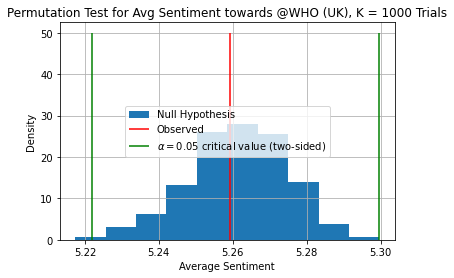

In [573]:
## Historgram ##
plt.hist(dt_res, density=True, label="Null Hypothesis")
plt.vlines(np.mean(list(tweets_sents_UK_dt["sentiment_score"])), 0, 50, color="red", label="Observed")
plt.vlines(sorted(dt_res)[int(0.025/2*100)], 0, 50, color="green", label=r"$\alpha=0.05$ critical value (two-sided)")
plt.vlines(sorted(dt_res)[-int(0.025/2*100)], 0, 50, color="green")
plt.title("Permutation Test for Avg Sentiment towards @WHO (UK), K = 1000 Trials")
plt.xlabel("Average Sentiment")
plt.ylabel("Density")

# Put a legend to the right of the current axis
plt.legend(loc='center')
plt.grid()
#plt.legend(loc='lower right')
plt.plot()

In [574]:
perm_df_dt = tweets_sents_CAN_dt.append(df_1)
perm_df_dt = perm_df_dt.reset_index(drop=True)
perm_df_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.222223e+18,2.416893e+09,corona,2020-01-28 18:21:21,0.458,0.476,0.485,0.311,0.426,-1.0,A,@marykingsley11 @CDCgov @WHO I found this arti...,24.0,5.280000,5,1
1,1.222273e+18,2.029328e+07,wuhan,2020-01-28 21:40:34,0.470,0.342,0.394,0.339,0.375,-1.0,A,@WHO @WHOWPRO @WHOSEARO @WHO_Europe @pahowho @...,49.0,5.205455,5,1
2,1.222301e+18,1.574283e+08,corona,2020-01-28 23:28:47,0.527,0.338,0.417,0.390,0.402,1.0,H,@piya @ShebaSid @WHO I vote “Insane Corona Pan...,12.0,5.440000,5,1
3,1.222566e+18,9.236274e+08,wuhan,2020-01-29 17:01:51,0.469,0.452,0.432,0.335,0.419,-1.0,F,"@WHO There are 49,000 hospital beds in 11 mill...",44.0,5.103125,5,1
4,1.222641e+18,7.746826e+17,nCoV,2020-01-29 22:00:09,0.383,0.601,0.476,0.274,0.533,-1.0,F,@WHO will re-convene tomorrow to discuss the p...,24.0,5.380000,5,1


In [575]:
dt_res = run_test(1000,len(tweets_sents_CAN_dt), len(df_1), perm_df_dt)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<06:01,  2.76it/s]

  0%|          | 2/1000 [00:00<05:54,  2.81it/s]

  0%|          | 3/1000 [00:01<06:02,  2.75it/s]

  0%|          | 4/1000 [00:01<06:07,  2.71it/s]

  0%|          | 5/1000 [00:01<06:12,  2.67it/s]

  1%|          | 6/1000 [00:02<06:16,  2.64it/s]

  1%|          | 7/1000 [00:02<06:18,  2.62it/s]

  1%|          | 8/1000 [00:03<06:19,  2.61it/s]

  1%|          | 9/1000 [00:03<06:16,  2.63it/s]

  1%|          | 10/1000 [00:03<06:16,  2.63it/s]

  1%|          | 11/1000 [00:04<06:15,  2.64it/s]

  1%|          | 12/1000 [00:04<06:15,  2.63it/s]

  1%|▏         | 13/1000 [00:04<06:17,  2.61it/s]

  1%|▏         | 14/1000 [00:05<06:17,  2.61it/s]

  2%|▏         | 15/1000 [00:05<06:14,  2.63it/s]

  2%|▏         | 16/1000 [00:06<06:11,  2.65it/s]

  2%|▏         | 17/1000 [00:06<06:12,  2.64it/s]

  2%|▏         | 18/1000 [00:06<06:09,  2.66it/s]

  2%|▏         | 19/1000 [00:07<06:06,  2.67it/

 14%|█▍        | 143/1000 [00:51<05:00,  2.85it/s]

 14%|█▍        | 144/1000 [00:51<05:01,  2.84it/s]

 14%|█▍        | 145/1000 [00:51<05:09,  2.76it/s]

 15%|█▍        | 146/1000 [00:52<05:13,  2.72it/s]

 15%|█▍        | 147/1000 [00:52<05:15,  2.70it/s]

 15%|█▍        | 148/1000 [00:52<05:17,  2.68it/s]

 15%|█▍        | 149/1000 [00:53<05:17,  2.68it/s]

 15%|█▌        | 150/1000 [00:53<05:16,  2.69it/s]

 15%|█▌        | 151/1000 [00:53<05:13,  2.71it/s]

 15%|█▌        | 152/1000 [00:54<05:08,  2.75it/s]

 15%|█▌        | 153/1000 [00:54<05:00,  2.82it/s]

 15%|█▌        | 154/1000 [00:55<04:55,  2.86it/s]

 16%|█▌        | 155/1000 [00:55<04:51,  2.90it/s]

 16%|█▌        | 156/1000 [00:55<04:49,  2.92it/s]

 16%|█▌        | 157/1000 [00:56<04:42,  2.98it/s]

 16%|█▌        | 158/1000 [00:56<04:42,  2.98it/s]

 16%|█▌        | 159/1000 [00:56<04:39,  3.01it/s]

 16%|█▌        | 160/1000 [00:56<04:37,  3.03it/s]

 16%|█▌        | 161/1000 [00:57<04:36,  3.03it/s]

 16%|█▌     

 28%|██▊       | 284/1000 [01:40<03:58,  3.00it/s]

 28%|██▊       | 285/1000 [01:40<03:55,  3.04it/s]

 29%|██▊       | 286/1000 [01:41<03:54,  3.04it/s]

 29%|██▊       | 287/1000 [01:41<03:52,  3.06it/s]

 29%|██▉       | 288/1000 [01:41<03:51,  3.08it/s]

 29%|██▉       | 289/1000 [01:42<03:49,  3.09it/s]

 29%|██▉       | 290/1000 [01:42<03:49,  3.09it/s]

 29%|██▉       | 291/1000 [01:42<03:49,  3.09it/s]

 29%|██▉       | 292/1000 [01:43<03:50,  3.08it/s]

 29%|██▉       | 293/1000 [01:43<03:49,  3.07it/s]

 29%|██▉       | 294/1000 [01:43<03:49,  3.07it/s]

 30%|██▉       | 295/1000 [01:44<03:48,  3.09it/s]

 30%|██▉       | 296/1000 [01:44<03:48,  3.08it/s]

 30%|██▉       | 297/1000 [01:44<03:49,  3.06it/s]

 30%|██▉       | 298/1000 [01:45<03:48,  3.07it/s]

 30%|██▉       | 299/1000 [01:45<03:47,  3.08it/s]

 30%|███       | 300/1000 [01:45<03:46,  3.09it/s]

 30%|███       | 301/1000 [01:45<03:45,  3.10it/s]

 30%|███       | 302/1000 [01:46<03:45,  3.10it/s]

 30%|███    

 42%|████▎     | 425/1000 [02:30<03:34,  2.68it/s]

 43%|████▎     | 426/1000 [02:30<03:35,  2.66it/s]

 43%|████▎     | 427/1000 [02:31<03:39,  2.61it/s]

 43%|████▎     | 428/1000 [02:31<03:37,  2.63it/s]

 43%|████▎     | 429/1000 [02:31<03:34,  2.67it/s]

 43%|████▎     | 430/1000 [02:32<03:31,  2.69it/s]

 43%|████▎     | 431/1000 [02:32<03:30,  2.71it/s]

 43%|████▎     | 432/1000 [02:32<03:34,  2.65it/s]

 43%|████▎     | 433/1000 [02:33<03:32,  2.66it/s]

 43%|████▎     | 434/1000 [02:33<03:33,  2.65it/s]

 44%|████▎     | 435/1000 [02:34<03:35,  2.62it/s]

 44%|████▎     | 436/1000 [02:34<03:38,  2.58it/s]

 44%|████▎     | 437/1000 [02:34<03:39,  2.56it/s]

 44%|████▍     | 438/1000 [02:35<03:43,  2.52it/s]

 44%|████▍     | 439/1000 [02:35<03:46,  2.48it/s]

 44%|████▍     | 440/1000 [02:36<03:38,  2.56it/s]

 44%|████▍     | 441/1000 [02:36<03:34,  2.60it/s]

 44%|████▍     | 442/1000 [02:36<03:33,  2.61it/s]

 44%|████▍     | 443/1000 [02:37<03:33,  2.61it/s]

 44%|████▍  

 57%|█████▋    | 566/1000 [03:19<02:25,  2.97it/s]

 57%|█████▋    | 567/1000 [03:19<02:24,  2.99it/s]

 57%|█████▋    | 568/1000 [03:20<02:25,  2.97it/s]

 57%|█████▋    | 569/1000 [03:20<02:23,  2.99it/s]

 57%|█████▋    | 570/1000 [03:20<02:24,  2.98it/s]

 57%|█████▋    | 571/1000 [03:21<02:23,  2.98it/s]

 57%|█████▋    | 572/1000 [03:21<02:22,  3.00it/s]

 57%|█████▋    | 573/1000 [03:21<02:21,  3.01it/s]

 57%|█████▋    | 574/1000 [03:22<02:22,  2.99it/s]

 57%|█████▊    | 575/1000 [03:22<02:21,  3.00it/s]

 58%|█████▊    | 576/1000 [03:22<02:22,  2.98it/s]

 58%|█████▊    | 577/1000 [03:23<02:22,  2.98it/s]

 58%|█████▊    | 578/1000 [03:23<02:20,  2.99it/s]

 58%|█████▊    | 579/1000 [03:23<02:20,  3.00it/s]

 58%|█████▊    | 580/1000 [03:24<02:19,  3.00it/s]

 58%|█████▊    | 581/1000 [03:24<02:19,  3.00it/s]

 58%|█████▊    | 582/1000 [03:24<02:18,  3.01it/s]

 58%|█████▊    | 583/1000 [03:25<02:18,  3.02it/s]

 58%|█████▊    | 584/1000 [03:25<02:18,  3.00it/s]

 58%|█████▊ 

 71%|███████   | 707/1000 [04:10<01:53,  2.59it/s]

 71%|███████   | 708/1000 [04:10<01:49,  2.67it/s]

 71%|███████   | 709/1000 [04:11<01:45,  2.76it/s]

 71%|███████   | 710/1000 [04:11<01:43,  2.79it/s]

 71%|███████   | 711/1000 [04:11<01:42,  2.81it/s]

 71%|███████   | 712/1000 [04:12<01:39,  2.88it/s]

 71%|███████▏  | 713/1000 [04:12<01:38,  2.91it/s]

 71%|███████▏  | 714/1000 [04:12<01:36,  2.95it/s]

 72%|███████▏  | 715/1000 [04:13<01:36,  2.96it/s]

 72%|███████▏  | 716/1000 [04:13<01:35,  2.96it/s]

 72%|███████▏  | 717/1000 [04:13<01:34,  2.99it/s]

 72%|███████▏  | 718/1000 [04:14<01:34,  2.98it/s]

 72%|███████▏  | 719/1000 [04:14<01:34,  2.99it/s]

 72%|███████▏  | 720/1000 [04:14<01:33,  2.98it/s]

 72%|███████▏  | 721/1000 [04:15<01:34,  2.96it/s]

 72%|███████▏  | 722/1000 [04:15<01:34,  2.95it/s]

 72%|███████▏  | 723/1000 [04:15<01:34,  2.93it/s]

 72%|███████▏  | 724/1000 [04:16<01:34,  2.93it/s]

 72%|███████▎  | 725/1000 [04:16<01:33,  2.93it/s]

 73%|███████

 85%|████████▍ | 848/1000 [04:58<00:50,  3.01it/s]

 85%|████████▍ | 849/1000 [04:58<00:49,  3.03it/s]

 85%|████████▌ | 850/1000 [04:59<00:49,  3.04it/s]

 85%|████████▌ | 851/1000 [04:59<00:49,  3.04it/s]

 85%|████████▌ | 852/1000 [04:59<00:48,  3.05it/s]

 85%|████████▌ | 853/1000 [05:00<00:48,  3.06it/s]

 85%|████████▌ | 854/1000 [05:00<00:48,  3.03it/s]

 86%|████████▌ | 855/1000 [05:00<00:47,  3.04it/s]

 86%|████████▌ | 856/1000 [05:01<00:47,  3.01it/s]

 86%|████████▌ | 857/1000 [05:01<00:47,  3.02it/s]

 86%|████████▌ | 858/1000 [05:01<00:46,  3.03it/s]

 86%|████████▌ | 859/1000 [05:02<00:46,  3.04it/s]

 86%|████████▌ | 860/1000 [05:02<00:46,  3.03it/s]

 86%|████████▌ | 861/1000 [05:02<00:45,  3.04it/s]

 86%|████████▌ | 862/1000 [05:03<00:45,  3.02it/s]

 86%|████████▋ | 863/1000 [05:03<00:45,  3.03it/s]

 86%|████████▋ | 864/1000 [05:03<00:44,  3.03it/s]

 86%|████████▋ | 865/1000 [05:04<00:44,  3.04it/s]

 87%|████████▋ | 866/1000 [05:04<00:44,  3.03it/s]

 87%|███████

 99%|█████████▉| 989/1000 [05:46<00:04,  2.61it/s]

 99%|█████████▉| 990/1000 [05:46<00:03,  2.68it/s]

 99%|█████████▉| 991/1000 [05:47<00:03,  2.72it/s]

 99%|█████████▉| 992/1000 [05:47<00:02,  2.68it/s]

 99%|█████████▉| 993/1000 [05:48<00:02,  2.66it/s]

 99%|█████████▉| 994/1000 [05:48<00:02,  2.71it/s]

100%|█████████▉| 995/1000 [05:48<00:01,  2.74it/s]

100%|█████████▉| 996/1000 [05:49<00:01,  2.79it/s]

100%|█████████▉| 997/1000 [05:49<00:01,  2.85it/s]

100%|█████████▉| 998/1000 [05:49<00:00,  2.87it/s]

100%|█████████▉| 999/1000 [05:50<00:00,  2.91it/s]

100%|██████████| 1000/1000 [05:50<00:00,  2.85it/s]


[]

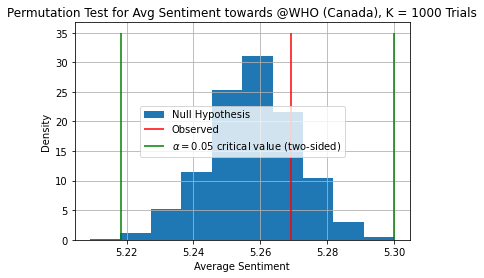

In [578]:
## Historgram ##
plt.hist(dt_res, density=True, label="Null Hypothesis")
plt.vlines(np.mean(list(tweets_sents_CAN_dt["sentiment_score"])), 0, 35, color="red", label="Observed")
plt.vlines(sorted(dt_res)[int(0.025/2*100)], 0, 35, color="green", label=r"$\alpha=0.05$ critical value (two-sided)")
plt.vlines(sorted(dt_res)[-int(0.025/2*100)], 0, 35, color="green")
plt.title("Permutation Test for Avg Sentiment towards @WHO (Canada), K = 1000 Trials")
plt.xlabel("Average Sentiment")
plt.ylabel("Density")

# Put a legend to the right of the current axis
plt.legend(loc='center')
plt.grid()
#plt.legend(loc='lower right')
plt.plot()

Boris and Justin:

In [579]:
idx_1 = []
df = tweets_sents_CAN_fam
for i in range(len(df)):
    if '@JustinTrudeau' in df["tweet"][i]:
        idx_1.append(i)
        
idx_2 = []
df_2 = tweets_sents_UK_fam
for i in range(len(df_2)):
    if '@BorisJohnson' in df_2["tweet"][i]:
        idx_2.append(i)

In [580]:
df_1 = tweets_sents_CAN_fam.drop(idx_1, axis=0)

In [581]:
tweets_sents_CAN_dt = tweets_sents_CAN_fam.iloc[idx_1]
tweets_sents_CAN_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.221960e+18,1.375214e+07,wuhan,2020-01-28 00:55:15,0.409,0.468,0.530,0.255,0.462,-1.0,A,@maurerbot @JustinTrudeau There's already What...,28.0,5.168750,5,1
10,1.222048e+18,1.221223e+18,wuhan,2020-01-28 06:45:06,0.550,0.335,0.354,0.430,0.372,1.0,H,"@C4RT3R_P @JustinTrudeau My daughter, A Canadi...",13.0,5.708571,5,1
95,1.222182e+18,1.131258e+18,wuhan,2020-01-28 15:35:58,0.325,0.573,0.534,0.184,0.512,-1.0,F,@PattyHajdu @JustinTrudeau I'm afraid you have...,18.0,5.307778,5,1
194,1.222231e+18,1.470736e+08,wuhan,2020-01-28 18:52:29,0.361,0.444,0.577,0.221,0.434,-1.0,A,Why isn’t Canada screening travellers arriving...,33.0,5.225882,5,1
423,1.222349e+18,1.090426e+18,wuhan,2020-01-29 02:39:48,0.386,0.522,0.431,0.284,0.472,-1.0,F,So the mayor of Wuhan offered to resign over t...,19.0,5.090000,5,1


In [582]:
tweets_sents_UK_dt = tweets_sents_UK_fam.iloc[idx_2]
tweets_sents_UK_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
197,1234427041333813249,2.791832e+08,covid,2020-03-02 10:35:15,0.466,0.456,0.467,0.287,0.432,-1.0,A,Um - doesn’t “stopping at nothing” mean that C...,30.0,5.019583,10,0
206,1234430061392138240,2.456837e+07,covid,2020-03-02 10:47:15,0.552,0.361,0.419,0.390,0.367,1.0,H,@RaynerSkyNews @NicolaSturgeon @BorisJohnson J...,35.0,5.193913,10,0
352,1234476181103271936,1.288244e+09,wuhan,2020-03-02 13:50:31,0.293,0.509,0.598,0.136,0.558,-2.0,A,@10DowningStreet @BorisJohnson @PHE_uk Why hav...,47.0,4.999474,10,0
419,1234495604698558464,2.273232e+08,corona,2020-03-02 15:07:42,0.457,0.391,0.454,0.279,0.341,-1.0,A,@piersmorgan @BorisJohnson It’s his hair. He ...,23.0,5.086842,10,0
471,1234509272819654656,1.020234e+18,corona,2020-03-02 16:02:01,0.390,0.433,0.495,0.262,0.478,-1.0,A,@piersmorgan @BorisJohnson Piers you’re still ...,50.0,5.406667,10,0


In [583]:
df_2 = tweets_sents_UK_fam.drop(idx_2, axis=0)

In [584]:
perm_df_dt = tweets_sents_UK_dt.append(df_2)
perm_df_dt = perm_df_dt.reset_index(drop=True)
perm_df_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1234427041333813249,2.791832e+08,covid,2020-03-02 10:35:15,0.466,0.456,0.467,0.287,0.432,-1.0,A,Um - doesn’t “stopping at nothing” mean that C...,30.0,5.019583,10,0
1,1234430061392138240,2.456837e+07,covid,2020-03-02 10:47:15,0.552,0.361,0.419,0.390,0.367,1.0,H,@RaynerSkyNews @NicolaSturgeon @BorisJohnson J...,35.0,5.193913,10,0
2,1234476181103271936,1.288244e+09,wuhan,2020-03-02 13:50:31,0.293,0.509,0.598,0.136,0.558,-2.0,A,@10DowningStreet @BorisJohnson @PHE_uk Why hav...,47.0,4.999474,10,0
3,1234495604698558464,2.273232e+08,corona,2020-03-02 15:07:42,0.457,0.391,0.454,0.279,0.341,-1.0,A,@piersmorgan @BorisJohnson It’s his hair. He ...,23.0,5.086842,10,0
4,1234509272819654656,1.020234e+18,corona,2020-03-02 16:02:01,0.390,0.433,0.495,0.262,0.478,-1.0,A,@piersmorgan @BorisJohnson Piers you’re still ...,50.0,5.406667,10,0


In [585]:
dt_res = run_test(1000,len(tweets_sents_UK_dt), len(df_2), perm_df_dt)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<05:50,  2.85it/s]

  0%|          | 2/1000 [00:00<05:48,  2.86it/s]

  0%|          | 3/1000 [00:01<05:42,  2.91it/s]

  0%|          | 4/1000 [00:01<05:56,  2.80it/s]

  0%|          | 5/1000 [00:01<05:59,  2.77it/s]

  1%|          | 6/1000 [00:02<06:01,  2.75it/s]

  1%|          | 7/1000 [00:02<06:02,  2.74it/s]

  1%|          | 8/1000 [00:02<05:56,  2.78it/s]

  1%|          | 9/1000 [00:03<05:49,  2.83it/s]

  1%|          | 10/1000 [00:03<05:57,  2.77it/s]

  1%|          | 11/1000 [00:03<05:57,  2.76it/s]

  1%|          | 12/1000 [00:04<05:58,  2.75it/s]

  1%|▏         | 13/1000 [00:04<06:00,  2.74it/s]

  1%|▏         | 14/1000 [00:05<06:01,  2.73it/s]

  2%|▏         | 15/1000 [00:05<06:01,  2.72it/s]

  2%|▏         | 16/1000 [00:05<06:00,  2.73it/s]

  2%|▏         | 17/1000 [00:06<05:59,  2.74it/s]

  2%|▏         | 18/1000 [00:06<06:00,  2.73it/s]

  2%|▏         | 19/1000 [00:06<06:00,  2.72it/

 14%|█▍        | 143/1000 [00:52<04:41,  3.04it/s]

 14%|█▍        | 144/1000 [00:52<04:38,  3.07it/s]

 14%|█▍        | 145/1000 [00:53<04:39,  3.05it/s]

 15%|█▍        | 146/1000 [00:53<04:44,  3.00it/s]

 15%|█▍        | 147/1000 [00:53<04:40,  3.04it/s]

 15%|█▍        | 148/1000 [00:54<04:41,  3.03it/s]

 15%|█▍        | 149/1000 [00:54<04:43,  3.00it/s]

 15%|█▌        | 150/1000 [00:54<04:39,  3.04it/s]

 15%|█▌        | 151/1000 [00:55<04:38,  3.04it/s]

 15%|█▌        | 152/1000 [00:55<04:37,  3.06it/s]

 15%|█▌        | 153/1000 [00:55<04:36,  3.06it/s]

 15%|█▌        | 154/1000 [00:56<04:36,  3.06it/s]

 16%|█▌        | 155/1000 [00:56<04:35,  3.07it/s]

 16%|█▌        | 156/1000 [00:56<04:34,  3.07it/s]

 16%|█▌        | 157/1000 [00:56<04:32,  3.10it/s]

 16%|█▌        | 158/1000 [00:57<04:30,  3.12it/s]

 16%|█▌        | 159/1000 [00:57<04:30,  3.11it/s]

 16%|█▌        | 160/1000 [00:57<04:28,  3.12it/s]

 16%|█▌        | 161/1000 [00:58<04:30,  3.10it/s]

 16%|█▌     

 28%|██▊       | 284/1000 [01:40<03:53,  3.07it/s]

 28%|██▊       | 285/1000 [01:40<03:52,  3.08it/s]

 29%|██▊       | 286/1000 [01:40<03:52,  3.07it/s]

 29%|██▊       | 287/1000 [01:41<03:51,  3.08it/s]

 29%|██▉       | 288/1000 [01:41<03:55,  3.02it/s]

 29%|██▉       | 289/1000 [01:41<03:54,  3.03it/s]

 29%|██▉       | 290/1000 [01:42<03:53,  3.04it/s]

 29%|██▉       | 291/1000 [01:42<03:53,  3.03it/s]

 29%|██▉       | 292/1000 [01:42<03:52,  3.04it/s]

 29%|██▉       | 293/1000 [01:43<03:52,  3.04it/s]

 29%|██▉       | 294/1000 [01:43<03:53,  3.02it/s]

 30%|██▉       | 295/1000 [01:43<03:54,  3.01it/s]

 30%|██▉       | 296/1000 [01:44<03:53,  3.01it/s]

 30%|██▉       | 297/1000 [01:44<03:53,  3.00it/s]

 30%|██▉       | 298/1000 [01:44<03:51,  3.03it/s]

 30%|██▉       | 299/1000 [01:45<03:51,  3.03it/s]

 30%|███       | 300/1000 [01:45<03:50,  3.03it/s]

 30%|███       | 301/1000 [01:45<03:49,  3.04it/s]

 30%|███       | 302/1000 [01:46<03:50,  3.03it/s]

 30%|███    

 42%|████▎     | 425/1000 [02:27<03:08,  3.04it/s]

 43%|████▎     | 426/1000 [02:27<03:09,  3.02it/s]

 43%|████▎     | 427/1000 [02:28<03:09,  3.03it/s]

 43%|████▎     | 428/1000 [02:28<03:08,  3.04it/s]

 43%|████▎     | 429/1000 [02:28<03:09,  3.01it/s]

 43%|████▎     | 430/1000 [02:29<03:07,  3.04it/s]

 43%|████▎     | 431/1000 [02:29<03:08,  3.02it/s]

 43%|████▎     | 432/1000 [02:29<03:10,  2.99it/s]

 43%|████▎     | 433/1000 [02:30<03:08,  3.00it/s]

 43%|████▎     | 434/1000 [02:30<03:08,  3.01it/s]

 44%|████▎     | 435/1000 [02:30<03:07,  3.02it/s]

 44%|████▎     | 436/1000 [02:31<03:05,  3.04it/s]

 44%|████▎     | 437/1000 [02:31<03:05,  3.04it/s]

 44%|████▍     | 438/1000 [02:31<03:04,  3.04it/s]

 44%|████▍     | 439/1000 [02:32<03:04,  3.04it/s]

 44%|████▍     | 440/1000 [02:32<03:05,  3.03it/s]

 44%|████▍     | 441/1000 [02:32<03:04,  3.04it/s]

 44%|████▍     | 442/1000 [02:33<03:04,  3.03it/s]

 44%|████▍     | 443/1000 [02:33<03:04,  3.03it/s]

 44%|████▍  

 57%|█████▋    | 566/1000 [03:14<02:23,  3.02it/s]

 57%|█████▋    | 567/1000 [03:14<02:23,  3.02it/s]

 57%|█████▋    | 568/1000 [03:15<02:22,  3.03it/s]

 57%|█████▋    | 569/1000 [03:15<02:21,  3.04it/s]

 57%|█████▋    | 570/1000 [03:15<02:23,  3.00it/s]

 57%|█████▋    | 571/1000 [03:16<02:21,  3.02it/s]

 57%|█████▋    | 572/1000 [03:16<02:21,  3.02it/s]

 57%|█████▋    | 573/1000 [03:16<02:20,  3.03it/s]

 57%|█████▋    | 574/1000 [03:17<02:20,  3.04it/s]

 57%|█████▊    | 575/1000 [03:17<02:20,  3.02it/s]

 58%|█████▊    | 576/1000 [03:17<02:20,  3.02it/s]

 58%|█████▊    | 577/1000 [03:18<02:20,  3.02it/s]

 58%|█████▊    | 578/1000 [03:18<02:19,  3.02it/s]

 58%|█████▊    | 579/1000 [03:18<02:19,  3.02it/s]

 58%|█████▊    | 580/1000 [03:19<02:18,  3.03it/s]

 58%|█████▊    | 581/1000 [03:19<02:18,  3.03it/s]

 58%|█████▊    | 582/1000 [03:19<02:17,  3.03it/s]

 58%|█████▊    | 583/1000 [03:20<02:16,  3.05it/s]

 58%|█████▊    | 584/1000 [03:20<02:17,  3.02it/s]

 58%|█████▊ 

 71%|███████   | 707/1000 [04:00<01:36,  3.04it/s]

 71%|███████   | 708/1000 [04:01<01:35,  3.05it/s]

 71%|███████   | 709/1000 [04:01<01:35,  3.05it/s]

 71%|███████   | 710/1000 [04:01<01:34,  3.06it/s]

 71%|███████   | 711/1000 [04:02<01:35,  3.03it/s]

 71%|███████   | 712/1000 [04:02<01:35,  3.02it/s]

 71%|███████▏  | 713/1000 [04:02<01:34,  3.04it/s]

 71%|███████▏  | 714/1000 [04:03<01:34,  3.01it/s]

 72%|███████▏  | 715/1000 [04:03<01:35,  2.99it/s]

 72%|███████▏  | 716/1000 [04:03<01:34,  3.01it/s]

 72%|███████▏  | 717/1000 [04:04<01:33,  3.03it/s]

 72%|███████▏  | 718/1000 [04:04<01:33,  3.03it/s]

 72%|███████▏  | 719/1000 [04:04<01:33,  3.00it/s]

 72%|███████▏  | 720/1000 [04:05<01:33,  3.01it/s]

 72%|███████▏  | 721/1000 [04:05<01:32,  3.03it/s]

 72%|███████▏  | 722/1000 [04:05<01:33,  2.98it/s]

 72%|███████▏  | 723/1000 [04:06<01:31,  3.01it/s]

 72%|███████▏  | 724/1000 [04:06<01:31,  3.02it/s]

 72%|███████▎  | 725/1000 [04:06<01:30,  3.03it/s]

 73%|███████

 85%|████████▍ | 848/1000 [04:47<00:50,  2.99it/s]

 85%|████████▍ | 849/1000 [04:47<00:50,  2.99it/s]

 85%|████████▌ | 850/1000 [04:48<00:49,  3.00it/s]

 85%|████████▌ | 851/1000 [04:48<00:49,  3.02it/s]

 85%|████████▌ | 852/1000 [04:48<00:49,  3.01it/s]

 85%|████████▌ | 853/1000 [04:49<00:48,  3.03it/s]

 85%|████████▌ | 854/1000 [04:49<00:48,  3.02it/s]

 86%|████████▌ | 855/1000 [04:49<00:47,  3.02it/s]

 86%|████████▌ | 856/1000 [04:50<00:47,  3.04it/s]

 86%|████████▌ | 857/1000 [04:50<00:47,  3.02it/s]

 86%|████████▌ | 858/1000 [04:50<00:47,  3.02it/s]

 86%|████████▌ | 859/1000 [04:51<00:46,  3.03it/s]

 86%|████████▌ | 860/1000 [04:51<00:46,  3.03it/s]

 86%|████████▌ | 861/1000 [04:51<00:46,  3.02it/s]

 86%|████████▌ | 862/1000 [04:52<00:50,  2.73it/s]

 86%|████████▋ | 863/1000 [04:52<00:49,  2.77it/s]

 86%|████████▋ | 864/1000 [04:53<00:48,  2.81it/s]

 86%|████████▋ | 865/1000 [04:53<00:49,  2.74it/s]

 87%|████████▋ | 866/1000 [04:53<00:48,  2.77it/s]

 87%|███████

 99%|█████████▉| 989/1000 [05:34<00:03,  3.06it/s]

 99%|█████████▉| 990/1000 [05:35<00:03,  3.06it/s]

 99%|█████████▉| 991/1000 [05:35<00:02,  3.04it/s]

 99%|█████████▉| 992/1000 [05:35<00:02,  3.05it/s]

 99%|█████████▉| 993/1000 [05:36<00:02,  3.04it/s]

 99%|█████████▉| 994/1000 [05:36<00:01,  3.05it/s]

100%|█████████▉| 995/1000 [05:36<00:01,  3.04it/s]

100%|█████████▉| 996/1000 [05:37<00:01,  3.05it/s]

100%|█████████▉| 997/1000 [05:37<00:00,  3.06it/s]

100%|█████████▉| 998/1000 [05:37<00:00,  3.06it/s]

100%|█████████▉| 999/1000 [05:38<00:00,  3.07it/s]

100%|██████████| 1000/1000 [05:38<00:00,  2.96it/s]


[]

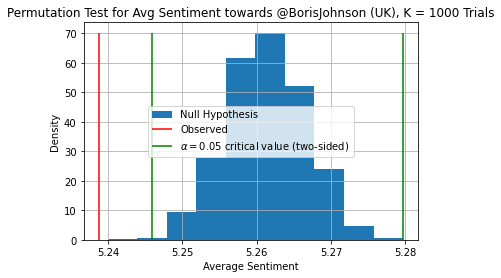

In [587]:
## Historgram ##
plt.hist(dt_res, density=True, label="Null Hypothesis")
plt.vlines(np.mean(list(tweets_sents_UK_dt["sentiment_score"])), 0, 70, color="red", label="Observed")
plt.vlines(sorted(dt_res)[int(0.025/2*100)], 0, 70, color="green", label=r"$\alpha=0.05$ critical value (two-sided)")
plt.vlines(sorted(dt_res)[-int(0.025/2*100)], 0, 70, color="green")
plt.title("Permutation Test for Avg Sentiment towards @BorisJohnson (UK), K = 1000 Trials")
plt.xlabel("Average Sentiment")
plt.ylabel("Density")

# Put a legend to the right of the current axis
plt.legend(loc='center')
plt.grid()
#plt.legend(loc='lower right')
plt.plot()

In [588]:
perm_df_dt = tweets_sents_CAN_dt.append(df_1)
perm_df_dt = perm_df_dt.reset_index(drop=True)
perm_df_dt.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.221960e+18,1.375214e+07,wuhan,2020-01-28 00:55:15,0.409,0.468,0.530,0.255,0.462,-1.0,A,@maurerbot @JustinTrudeau There's already What...,28.0,5.168750,5,1
1,1.222048e+18,1.221223e+18,wuhan,2020-01-28 06:45:06,0.550,0.335,0.354,0.430,0.372,1.0,H,"@C4RT3R_P @JustinTrudeau My daughter, A Canadi...",13.0,5.708571,5,1
2,1.222182e+18,1.131258e+18,wuhan,2020-01-28 15:35:58,0.325,0.573,0.534,0.184,0.512,-1.0,F,@PattyHajdu @JustinTrudeau I'm afraid you have...,18.0,5.307778,5,1
3,1.222231e+18,1.470736e+08,wuhan,2020-01-28 18:52:29,0.361,0.444,0.577,0.221,0.434,-1.0,A,Why isn’t Canada screening travellers arriving...,33.0,5.225882,5,1
4,1.222349e+18,1.090426e+18,wuhan,2020-01-29 02:39:48,0.386,0.522,0.431,0.284,0.472,-1.0,F,So the mayor of Wuhan offered to resign over t...,19.0,5.090000,5,1


In [589]:
dt_res = run_test(1000,len(tweets_sents_CAN_dt), len(df_1), perm_df_dt)



  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 1/1000 [00:00<06:07,  2.72it/s]

  0%|          | 2/1000 [00:00<06:02,  2.75it/s]

  0%|          | 3/1000 [00:01<06:18,  2.63it/s]

  0%|          | 4/1000 [00:01<06:11,  2.68it/s]

  0%|          | 5/1000 [00:01<06:22,  2.60it/s]

  1%|          | 6/1000 [00:02<06:21,  2.61it/s]

  1%|          | 7/1000 [00:02<06:19,  2.62it/s]

  1%|          | 8/1000 [00:03<06:22,  2.59it/s]

  1%|          | 9/1000 [00:03<06:22,  2.59it/s]

  1%|          | 10/1000 [00:03<06:08,  2.68it/s]

  1%|          | 11/1000 [00:04<06:02,  2.73it/s]

  1%|          | 12/1000 [00:04<05:57,  2.76it/s]

  1%|▏         | 13/1000 [00:04<05:50,  2.82it/s]

  1%|▏         | 14/1000 [00:05<05:48,  2.83it/s]

  2%|▏         | 15/1000 [00:05<05:46,  2.84it/s]

  2%|▏         | 16/1000 [00:05<05:39,  2.90it/s]

  2%|▏         | 17/1000 [00:06<05:36,  2.92it/s]

  2%|▏         | 18/1000 [00:06<05:32,  2.95it/s]

  2%|▏         | 19/1000 [00:06<05:33,  2.94it/

 14%|█▍        | 143/1000 [00:49<04:45,  3.00it/s]

 14%|█▍        | 144/1000 [00:49<04:44,  3.01it/s]

 14%|█▍        | 145/1000 [00:49<04:47,  2.98it/s]

 15%|█▍        | 146/1000 [00:50<04:47,  2.97it/s]

 15%|█▍        | 147/1000 [00:50<04:44,  3.00it/s]

 15%|█▍        | 148/1000 [00:50<04:43,  3.01it/s]

 15%|█▍        | 149/1000 [00:51<04:41,  3.02it/s]

 15%|█▌        | 150/1000 [00:51<04:39,  3.04it/s]

 15%|█▌        | 151/1000 [00:51<04:40,  3.02it/s]

 15%|█▌        | 152/1000 [00:52<04:40,  3.03it/s]

 15%|█▌        | 153/1000 [00:52<04:46,  2.95it/s]

 15%|█▌        | 154/1000 [00:52<04:48,  2.93it/s]

 16%|█▌        | 155/1000 [00:53<04:52,  2.89it/s]

 16%|█▌        | 156/1000 [00:53<04:50,  2.90it/s]

 16%|█▌        | 157/1000 [00:53<04:50,  2.90it/s]

 16%|█▌        | 158/1000 [00:54<04:49,  2.90it/s]

 16%|█▌        | 159/1000 [00:54<04:53,  2.86it/s]

 16%|█▌        | 160/1000 [00:55<04:58,  2.81it/s]

 16%|█▌        | 161/1000 [00:55<05:09,  2.71it/s]

 16%|█▌     

 28%|██▊       | 284/1000 [01:39<03:59,  2.99it/s]

 28%|██▊       | 285/1000 [01:39<04:00,  2.97it/s]

 29%|██▊       | 286/1000 [01:40<03:58,  3.00it/s]

 29%|██▊       | 287/1000 [01:40<03:57,  3.01it/s]

 29%|██▉       | 288/1000 [01:40<03:57,  3.00it/s]

 29%|██▉       | 289/1000 [01:41<03:57,  3.00it/s]

 29%|██▉       | 290/1000 [01:41<03:58,  2.97it/s]

 29%|██▉       | 291/1000 [01:41<04:04,  2.90it/s]

 29%|██▉       | 292/1000 [01:42<04:12,  2.80it/s]

 29%|██▉       | 293/1000 [01:42<04:18,  2.73it/s]

 29%|██▉       | 294/1000 [01:43<04:22,  2.69it/s]

 30%|██▉       | 295/1000 [01:43<04:23,  2.67it/s]

 30%|██▉       | 296/1000 [01:43<04:21,  2.69it/s]

 30%|██▉       | 297/1000 [01:44<04:19,  2.71it/s]

 30%|██▉       | 298/1000 [01:44<04:14,  2.75it/s]

 30%|██▉       | 299/1000 [01:44<04:08,  2.82it/s]

 30%|███       | 300/1000 [01:45<04:03,  2.88it/s]

 30%|███       | 301/1000 [01:45<03:59,  2.92it/s]

 30%|███       | 302/1000 [01:45<03:56,  2.95it/s]

 30%|███    

 42%|████▎     | 425/1000 [02:27<03:21,  2.86it/s]

 43%|████▎     | 426/1000 [02:28<03:27,  2.77it/s]

 43%|████▎     | 427/1000 [02:28<03:30,  2.73it/s]

 43%|████▎     | 428/1000 [02:28<03:33,  2.68it/s]

 43%|████▎     | 429/1000 [02:29<03:31,  2.69it/s]

 43%|████▎     | 430/1000 [02:29<03:29,  2.72it/s]

 43%|████▎     | 431/1000 [02:29<03:32,  2.68it/s]

 43%|████▎     | 432/1000 [02:30<03:29,  2.72it/s]

 43%|████▎     | 433/1000 [02:30<03:22,  2.81it/s]

 43%|████▎     | 434/1000 [02:30<03:18,  2.85it/s]

 44%|████▎     | 435/1000 [02:31<03:15,  2.89it/s]

 44%|████▎     | 436/1000 [02:31<03:12,  2.93it/s]

 44%|████▎     | 437/1000 [02:31<03:12,  2.93it/s]

 44%|████▍     | 438/1000 [02:32<03:11,  2.94it/s]

 44%|████▍     | 439/1000 [02:32<03:09,  2.97it/s]

 44%|████▍     | 440/1000 [02:32<03:09,  2.95it/s]

 44%|████▍     | 441/1000 [02:33<03:08,  2.96it/s]

 44%|████▍     | 442/1000 [02:33<03:06,  2.99it/s]

 44%|████▍     | 443/1000 [02:33<03:08,  2.96it/s]

 44%|████▍  

 57%|█████▋    | 566/1000 [03:16<02:32,  2.85it/s]

 57%|█████▋    | 567/1000 [03:16<02:31,  2.86it/s]

 57%|█████▋    | 568/1000 [03:16<02:29,  2.89it/s]

 57%|█████▋    | 569/1000 [03:17<02:28,  2.89it/s]

 57%|█████▋    | 570/1000 [03:17<02:26,  2.93it/s]

 57%|█████▋    | 571/1000 [03:17<02:25,  2.95it/s]

 57%|█████▋    | 572/1000 [03:18<02:24,  2.96it/s]

 57%|█████▋    | 573/1000 [03:18<02:23,  2.97it/s]

 57%|█████▋    | 574/1000 [03:18<02:22,  3.00it/s]

 57%|█████▊    | 575/1000 [03:19<02:22,  2.99it/s]

 58%|█████▊    | 576/1000 [03:19<02:21,  2.99it/s]

 58%|█████▊    | 577/1000 [03:19<02:20,  3.00it/s]

 58%|█████▊    | 578/1000 [03:20<02:23,  2.94it/s]

 58%|█████▊    | 579/1000 [03:20<02:22,  2.96it/s]

 58%|█████▊    | 580/1000 [03:20<02:20,  2.98it/s]

 58%|█████▊    | 581/1000 [03:21<02:21,  2.96it/s]

 58%|█████▊    | 582/1000 [03:21<02:20,  2.97it/s]

 58%|█████▊    | 583/1000 [03:21<02:19,  2.98it/s]

 58%|█████▊    | 584/1000 [03:22<02:19,  2.98it/s]

 58%|█████▊ 

 71%|███████   | 707/1000 [04:04<01:38,  2.97it/s]

 71%|███████   | 708/1000 [04:05<01:39,  2.94it/s]

 71%|███████   | 709/1000 [04:05<01:38,  2.96it/s]

 71%|███████   | 710/1000 [04:05<01:37,  2.99it/s]

 71%|███████   | 711/1000 [04:06<01:36,  2.98it/s]

 71%|███████   | 712/1000 [04:06<01:36,  2.98it/s]

 71%|███████▏  | 713/1000 [04:06<01:37,  2.93it/s]

 71%|███████▏  | 714/1000 [04:07<01:38,  2.89it/s]

 72%|███████▏  | 715/1000 [04:07<01:37,  2.93it/s]

 72%|███████▏  | 716/1000 [04:07<01:36,  2.93it/s]

 72%|███████▏  | 717/1000 [04:08<01:37,  2.92it/s]

 72%|███████▏  | 718/1000 [04:08<01:35,  2.94it/s]

 72%|███████▏  | 719/1000 [04:08<01:34,  2.96it/s]

 72%|███████▏  | 720/1000 [04:09<01:35,  2.95it/s]

 72%|███████▏  | 721/1000 [04:09<01:34,  2.96it/s]

 72%|███████▏  | 722/1000 [04:09<01:33,  2.98it/s]

 72%|███████▏  | 723/1000 [04:10<01:33,  2.96it/s]

 72%|███████▏  | 724/1000 [04:10<01:32,  2.98it/s]

 72%|███████▎  | 725/1000 [04:10<01:32,  2.98it/s]

 73%|███████

 85%|████████▍ | 848/1000 [04:52<00:53,  2.85it/s]

 85%|████████▍ | 849/1000 [04:52<00:54,  2.79it/s]

 85%|████████▌ | 850/1000 [04:53<00:55,  2.72it/s]

 85%|████████▌ | 851/1000 [04:53<00:55,  2.68it/s]

 85%|████████▌ | 852/1000 [04:53<00:55,  2.66it/s]

 85%|████████▌ | 853/1000 [04:54<00:55,  2.63it/s]

 85%|████████▌ | 854/1000 [04:54<00:55,  2.62it/s]

 86%|████████▌ | 855/1000 [04:55<00:55,  2.61it/s]

 86%|████████▌ | 856/1000 [04:55<00:54,  2.64it/s]

 86%|████████▌ | 857/1000 [04:55<00:54,  2.61it/s]

 86%|████████▌ | 858/1000 [04:56<00:55,  2.56it/s]

 86%|████████▌ | 859/1000 [04:56<00:56,  2.47it/s]

 86%|████████▌ | 860/1000 [04:57<00:55,  2.54it/s]

 86%|████████▌ | 861/1000 [04:57<00:55,  2.52it/s]

 86%|████████▌ | 862/1000 [04:57<00:53,  2.57it/s]

 86%|████████▋ | 863/1000 [04:58<00:51,  2.67it/s]

 86%|████████▋ | 864/1000 [04:58<00:49,  2.76it/s]

 86%|████████▋ | 865/1000 [04:58<00:48,  2.80it/s]

 87%|████████▋ | 866/1000 [04:59<00:47,  2.83it/s]

 87%|███████

 99%|█████████▉| 989/1000 [05:41<00:03,  2.79it/s]

 99%|█████████▉| 990/1000 [05:42<00:03,  2.81it/s]

 99%|█████████▉| 991/1000 [05:42<00:03,  2.86it/s]

 99%|█████████▉| 992/1000 [05:42<00:02,  2.91it/s]

 99%|█████████▉| 993/1000 [05:43<00:02,  2.91it/s]

 99%|█████████▉| 994/1000 [05:43<00:02,  2.92it/s]

100%|█████████▉| 995/1000 [05:43<00:01,  2.94it/s]

100%|█████████▉| 996/1000 [05:44<00:01,  2.93it/s]

100%|█████████▉| 997/1000 [05:44<00:01,  2.93it/s]

100%|█████████▉| 998/1000 [05:44<00:00,  2.91it/s]

100%|█████████▉| 999/1000 [05:45<00:00,  2.93it/s]

100%|██████████| 1000/1000 [05:45<00:00,  2.89it/s]


[]

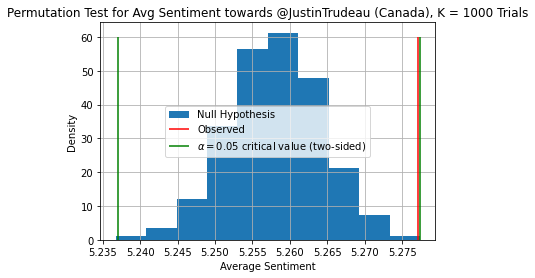

In [591]:
## Historgram ##
plt.hist(dt_res, density=True, label="Null Hypothesis")
plt.vlines(np.mean(list(tweets_sents_CAN_dt["sentiment_score"])), 0, 60, color="red", label="Observed")
plt.vlines(sorted(dt_res)[int(0.025/2*100)], 0, 60, color="green", label=r"$\alpha=0.05$ critical value (two-sided)")
plt.vlines(sorted(dt_res)[-int(0.025/2*100)], 0, 60, color="green")
plt.title("Permutation Test for Avg Sentiment towards @JustinTrudeau (Canada), K = 1000 Trials")
plt.xlabel("Average Sentiment")
plt.ylabel("Density")

# Put a legend to the right of the current axis
plt.legend(loc='center')
plt.grid()
#plt.legend(loc='lower right')
plt.plot()

BorisJohnson:

In [460]:
idx_1 = []
df = tweets_sents_CAN_fam
for i in range(len(df)):
    if '@JustinTrudeau' in df["tweet"][i]:
        idx_1.append(i)
        
idx_2 = []
df_1 = tweets_sents_UK_fam
for i in range(len(df_1)):
    if '@BorisJohnson' in df_1["tweet"][i]:
        idx_2.append(i)

In [463]:
tweets_sents_CAN_who = tweets_sents_CAN_fam.iloc[idx_1]

In [464]:
tweets_sents_UK_who = tweets_sents_UK_fam.iloc[idx_2]
tweets_sents_UK_who.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
197,1234427041333813249,2.791832e+08,covid,2020-03-02 10:35:15,0.466,0.456,0.467,0.287,0.432,-1.0,A,Um - doesn’t “stopping at nothing” mean that C...,30.0,5.019583,10,0
206,1234430061392138240,2.456837e+07,covid,2020-03-02 10:47:15,0.552,0.361,0.419,0.390,0.367,1.0,H,@RaynerSkyNews @NicolaSturgeon @BorisJohnson J...,35.0,5.193913,10,0
352,1234476181103271936,1.288244e+09,wuhan,2020-03-02 13:50:31,0.293,0.509,0.598,0.136,0.558,-2.0,A,@10DowningStreet @BorisJohnson @PHE_uk Why hav...,47.0,4.999474,10,0
419,1234495604698558464,2.273232e+08,corona,2020-03-02 15:07:42,0.457,0.391,0.454,0.279,0.341,-1.0,A,@piersmorgan @BorisJohnson It’s his hair. He ...,23.0,5.086842,10,0
471,1234509272819654656,1.020234e+18,corona,2020-03-02 16:02:01,0.390,0.433,0.495,0.262,0.478,-1.0,A,@piersmorgan @BorisJohnson Piers you’re still ...,50.0,5.406667,10,0


In [465]:
perm_df_who = tweets_sents_UK_who.append(tweets_sents_CAN_who)
perm_df_who = perm_df_who.reset_index(drop=True)
perm_df_who.head(5)

,tweet_ID,user_id,keywords,tweet_timestamp,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity,sentiment,emotion,tweet,len_content,sentiment_score,week_number,country
0,1.234427e+18,2.791832e+08,covid,2020-03-02 10:35:15,0.466,0.456,0.467,0.287,0.432,-1.0,A,Um - doesn’t “stopping at nothing” mean that C...,30.0,5.019583,10,0
1,1.234430e+18,2.456837e+07,covid,2020-03-02 10:47:15,0.552,0.361,0.419,0.390,0.367,1.0,H,@RaynerSkyNews @NicolaSturgeon @BorisJohnson J...,35.0,5.193913,10,0
2,1.234476e+18,1.288244e+09,wuhan,2020-03-02 13:50:31,0.293,0.509,0.598,0.136,0.558,-2.0,A,@10DowningStreet @BorisJohnson @PHE_uk Why hav...,47.0,4.999474,10,0
3,1.234496e+18,2.273232e+08,corona,2020-03-02 15:07:42,0.457,0.391,0.454,0.279,0.341,-1.0,A,@piersmorgan @BorisJohnson It’s his hair. He ...,23.0,5.086842,10,0
4,1.234509e+18,1.020234e+18,corona,2020-03-02 16:02:01,0.390,0.433,0.495,0.262,0.478,-1.0,A,@piersmorgan @BorisJohnson Piers you’re still ...,50.0,5.406667,10,0


In [466]:
random_can_who, random_uk_who = zip(*[shuffling_experiment(len(tweets_sents_UK_who), len(tweets_sents_CAN_who)) for i in tqdm(range(1000))])

100%|██████████| 1000/1000 [00:08<00:00, 117.76it/s]


In [467]:
mean_can_who = np.mean(tweets_sents_CAN_who['sentiment_score'])
mean_uk_who = np.mean(tweets_sents_UK_who['sentiment_score'])

In [468]:
p_value_can_who = np.sum(np.array(random_can_who)>mean_can_who)/1000
p_value_uk_who = np.sum(np.array(random_uk_who)<mean_uk_who)/1000

In [469]:
print(f"P-value for the first hypothesis: {p_value_can_who}\nP-value for the second hypothesis", p_value_uk_who)

P-value for the first hypothesis: 0.0
P-value for the second hypothesis 1.0


In [597]:
idx_1 = []
df = tweets_sents_CAN_fam
for i in range(len(df)):
    if '@YouTube' in df["tweet"][i]:
        idx_1.append(i)

In [603]:
tweets_sents_UK_C = tweets_sents_CAN_fam.iloc[idx_1]
top5 = tweets_sents_UK_C.head(20)

In [604]:
for i in list(top5["tweet"]):
    print("Tweet:")
    print(i)

Tweet:
CORONA VIRUS  - Wuhan Nurse Tells Truth.  Please Accept JESUS TODAY, BEF... https://t.co/BAO8tfeIqH via @YouTube
Tweet:
What Is Corona Virus And How it is Spreading In china Urdu Hindi https://t.co/jGz4c0lx0l via @YouTube
Tweet:
Change of Plans? Corona Virus Edition https://t.co/cdgs2ucOJL via @YouTube
Tweet:
108 - Corona and Air Traffic and School Strikes and Trade Deals https://t.co/4P2UITferN via @YouTube
Tweet:
Coronavirus outbreak: Wuhan lockdown leads to empty streets, train stations https://t.co/PuR7LA64RA via @YouTube
Tweet:
Watch this US citizen describe her journey to flee Wuhan with her daughter https://t.co/3hpfMSjUOV via @YouTube
Tweet:
Wuhan citizen plainly tells the #coronavirus situation in Wuhan &amp; seeks ... https://t.co/f6Rr8XemN8 via @YouTube 
❗️❗️❗️
Tweet:
WUHAN NURSE Tells The Truth About Corona Virus - 90000 People Infected f... https://t.co/ibwHR8JuXI via @YouTube
Tweet:
Inside Wuhan: Daily life in China's coronavirus quarantine zone https://t.co/Nrogx5

* H1: Canadian tweets mentioning @WHO have a higher averge value for sentiment than a similarly sized set of randomly selected tweets.
* *H2: UK tweets mentioning @WHO have a lower average value for sentiment than a similarly sized set of randomly selected tweets.

>In order to perform the label permutation test, we randomly shuffled the labels of all Canadian and UK tweets 1000 times (by keeping the same total number of Canadian and UK tweets) and for each of these random experiment we calculated the average sentiment score. Then to test the first hypothesis, we considered the fraction of times that the sentiment score for the randomly selected Canadian tweets was higher than the average sentiment score of the Canadian tweets in the superheroes network, this proportion can be considered as a p-value. We did the same for the UK tweets but we considered the proportion of the average sentiment score for the randomly selected UK tweets that was lower than the average sentiment score for the UK tweets in the superheroes network. As we can see, both p-values are zero which means that we can reject the null hypothesis that in this case are respectively:
 >* H0 (for H1): there is no difference between Canadian tweets' sentiment score and randomly selected tweets.
 >* H0 (for H2): there is no difference between UK tweets' sentimnent score and randomly selected tweets.

>Thus, under the assumption that both these null hypothesis are true, the probability of observing such differences would be 1. We can thus accept both null hypothesis and reject the alternative hypothesis H1 and H2.